## Introduction: Business Analysis of Sales Data
In this analysis, we will explore the sales performance of various products across different regions, retailers, and sales methods. Our objective is to address key business questions that are critical for making informed decisions, optimizing sales strategies, and understanding consumer behavior. By conducting a series of statistical tests and comparisons, we aim to answer the following business questions:

<br>


In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
df = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/Adidas-US-Sales-Analysis/main/Adidas%20US%20Sales%20Dataset.csv')
df = df[df['Total Sales'] != 0]
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


<br>

## General Sales Analysis

### 1. What is the total revenue generated across all retailers?

In [339]:
df['Total Sales'].sum()

899902125.0

The total sales amount to **$899 902 125**. This significant figure reflects the overall performance across all product categories, regions, retailers, and sales methods.

<br>


### 2. Which retailer contributes the most to total sales revenue?

In [340]:
df.groupby('Retailer')['Total Sales'].sum()

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: Total Sales, dtype: float64

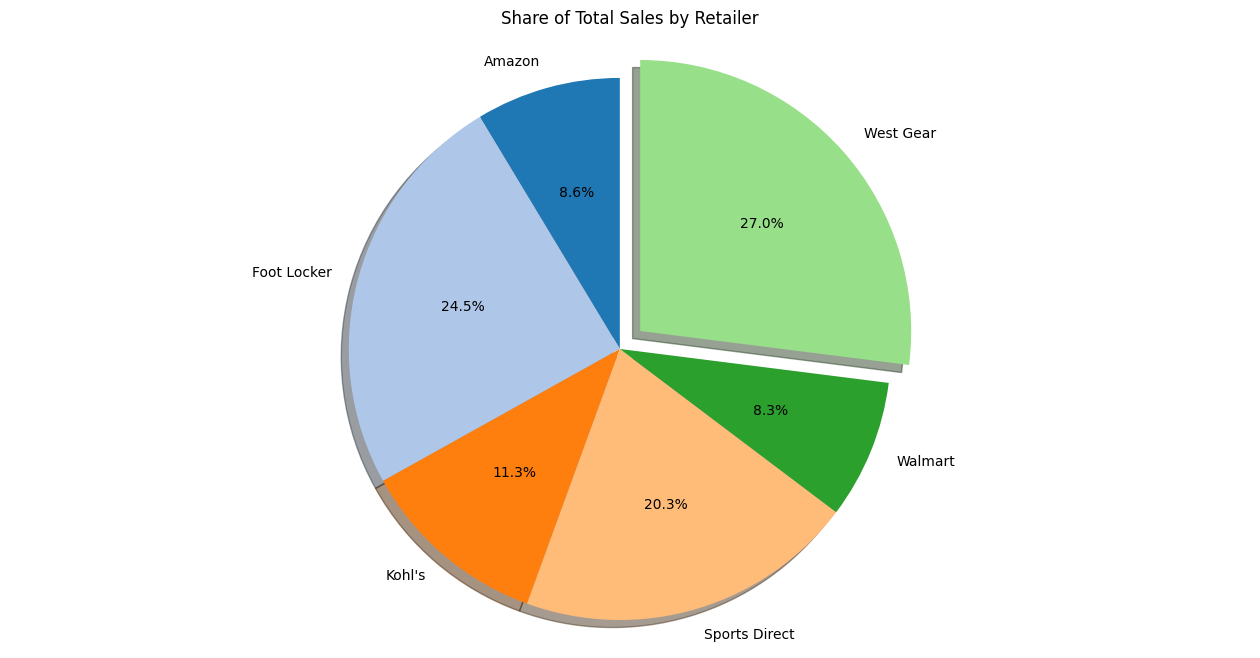

In [341]:
total_sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
explode_index = total_sales_by_retailer.idxmax()
explode = [0.1 if retailer == explode_index else 0 for retailer in total_sales_by_retailer.index]
colors = plt.get_cmap('tab20').colors
ax.pie(total_sales_by_retailer, labels=total_sales_by_retailer.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=colors[:len(total_sales_by_retailer)])
ax.axis('equal')
ax.set_title('Share of Total Sales by Retailer')
plt.show()

In the total revenue from the sale of Adidas products in the analyzed dataset, the largest share belongs to the retailer **West Gear** with a total of **$242 964 333** which represents **27%** of the total sales.

<br>


### 3. What is the average sales revenue?

In [342]:
df['Total Sales'].mean()

93312.12411862297

The average revenue in the Adidas sales dataset stands at an impressive **$93 273.43**.

<br>


### 4. How does the number of units sold vary by region?

In [343]:
df.groupby('Region')['Units Sold'].sum()

Region
Midwest      391337
Northeast    501279
South        492260
Southeast    407000
West         686985
Name: Units Sold, dtype: int64

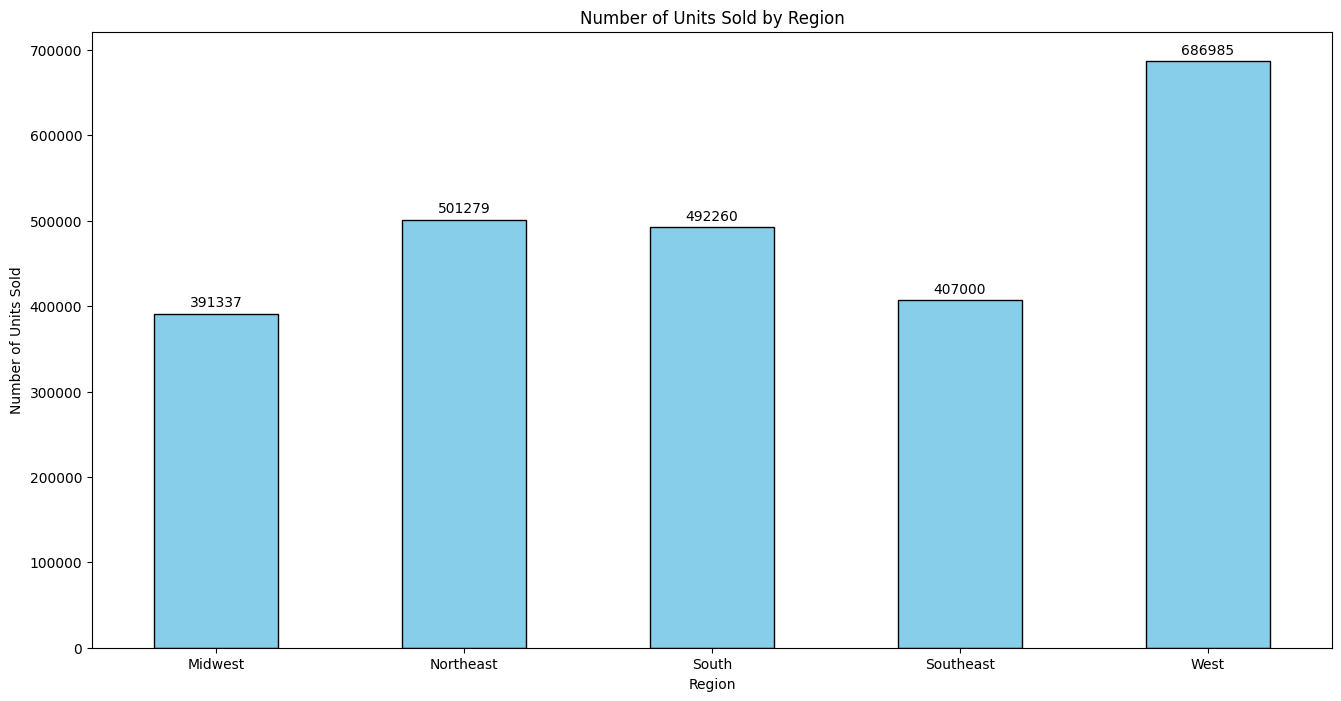

In [344]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Number of Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The number of units sold varies significantly by region. The **West** leads with **686 985** units sold, demonstrating the highest demand in that area. The **Northeast** follows with **501 279** units sold, and the **South** is close behind with **492 260** units. The **Southeast** shows slightly lower sales, with **407 000** units sold, while the **Midwest** has the smallest share, with **391 337** units sold. These figures indicate that sales are highest in the Western region, while the Midwest experiences relatively lower demand.

<br>


### 5. Which city generates the highest total sales?

In [345]:
df.groupby('City')['Total Sales'].sum().nlargest(1)

City
Charleston    39974797.0
Name: Total Sales, dtype: float64

Among the cities listed, **Charleston** generates the highest total sales, amounting to **$39 974 797**. This figure highlights Charleston as the leading city in terms of total sales performance.

<br>


### 6. How many unique retailers are present in the dataset?

In [346]:
df['Retailer'].nunique()

6

There are **6 unique retailers** present in the dataset.

<br>

### 7. What is the most sold product category by volume?

In [347]:
def split_product(product):
    parts = product.split("'", 1)
    return parts[0].strip(), parts[1].strip() if len(parts) > 1 else ''

In [348]:
df[['Gender', 'Category']] = df['Product'].apply(lambda x: pd.Series(split_product(x)))
df['Category'] = df['Category'].str.lstrip('s ').str.strip()

In [349]:
df.groupby('Category')['Units Sold'].sum()

Category
Apparel              740510
Athletic Footwear    752762
Street Footwear      985589
Name: Units Sold, dtype: int64

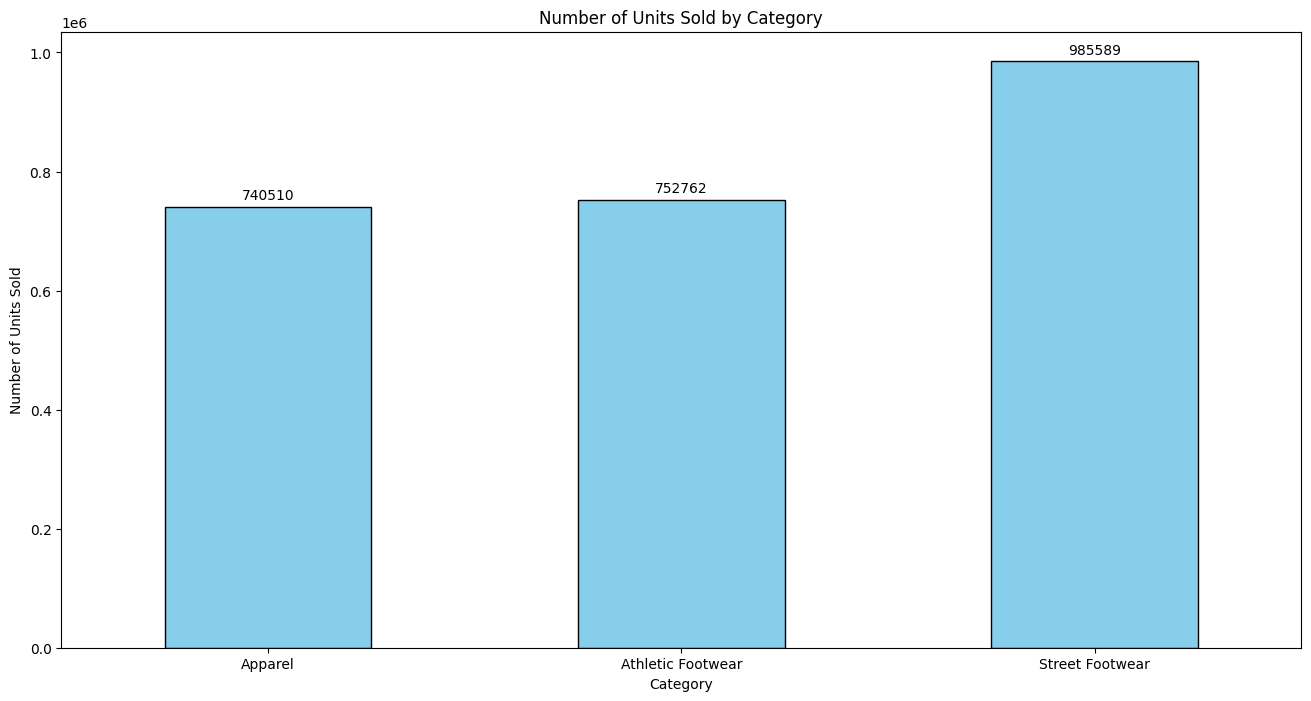

In [350]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Number of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The most sold product category by volume is **Street Footwear**, with a total of **985 589** units sold. This category leads in sales volume compared to Apparel and Athletic Footwear.

<br>


### 8. What is the total sales revenue for each region?

In [351]:
df.groupby('Region')['Total Sales'].sum()

Region
Midwest      135800459.0
Northeast    186324067.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: Total Sales, dtype: float64

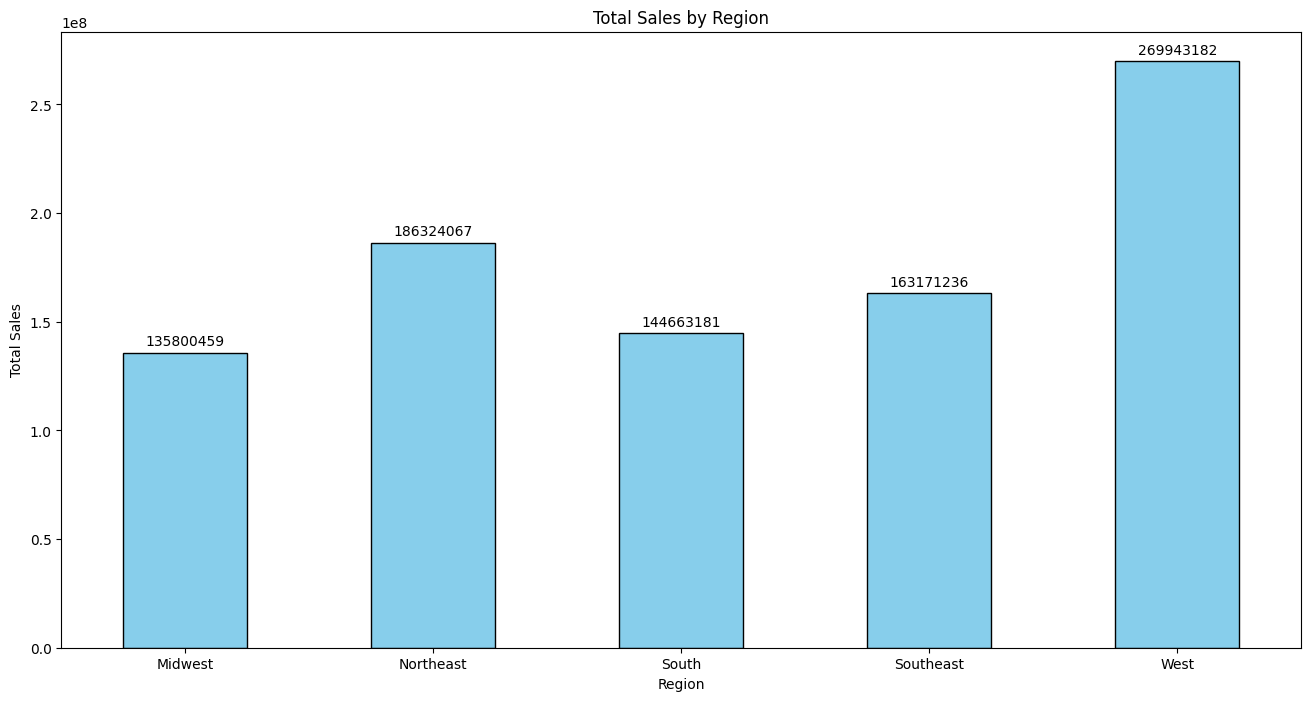

In [352]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Total Sales'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The total sales revenue for each region is as follows: The **Midwest** generated **$135 800 459**, while the **Northeast** achieved **$186 324 067**. The **South** accumulated **$144 663 181** in sales revenue and the **Southeast** reached **$163 171 236**. The **West** leads with the highest revenue, totaling **$269 943 182**.

<br>


### 9. How does sales revenue vary by product category?

In [353]:
df.groupby('Category')['Total Sales'].sum()

Category
Apparel              302767492.0
Athletic Footwear    260305576.0
Street Footwear      336829057.0
Name: Total Sales, dtype: float64

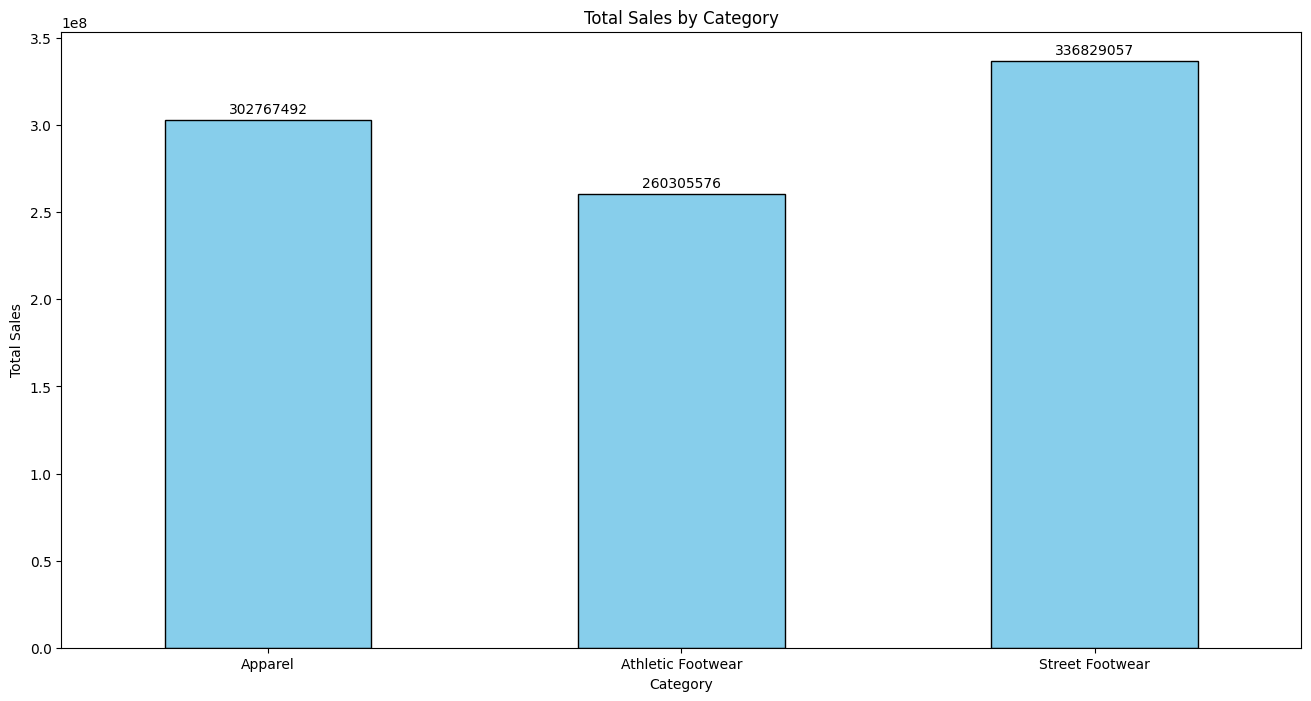

In [354]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Total Sales'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

Sales revenue varies significantly by product category. **Street Footwear** leads with the highest revenue, totaling **$336 829 057**. This is followed by **Apparel**, which generated **$302 767 492** in revenue. **Athletic Footwear** comes in third, with a total revenue of **$260 305 576**.

<br>


### 10. What are the top three cities in terms of total sales?

In [355]:
df.groupby('City')['Total Sales'].sum().nlargest(3)

City
Charleston       39974797.0
New York         39801235.0
San Francisco    34539220.0
Name: Total Sales, dtype: float64

The top three cities in terms of total sales are **Charleston** with **$39 974 797**, **New York** with **$39 801 235** and **San Francisco** with **$34 539 220**.

<br>


### 11. Which region contributes the most to profit?

In [356]:
df.groupby('Region')['Operating Profit'].sum()

Region
Midwest      52811346.48
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
West         89609406.55
Name: Operating Profit, dtype: float64

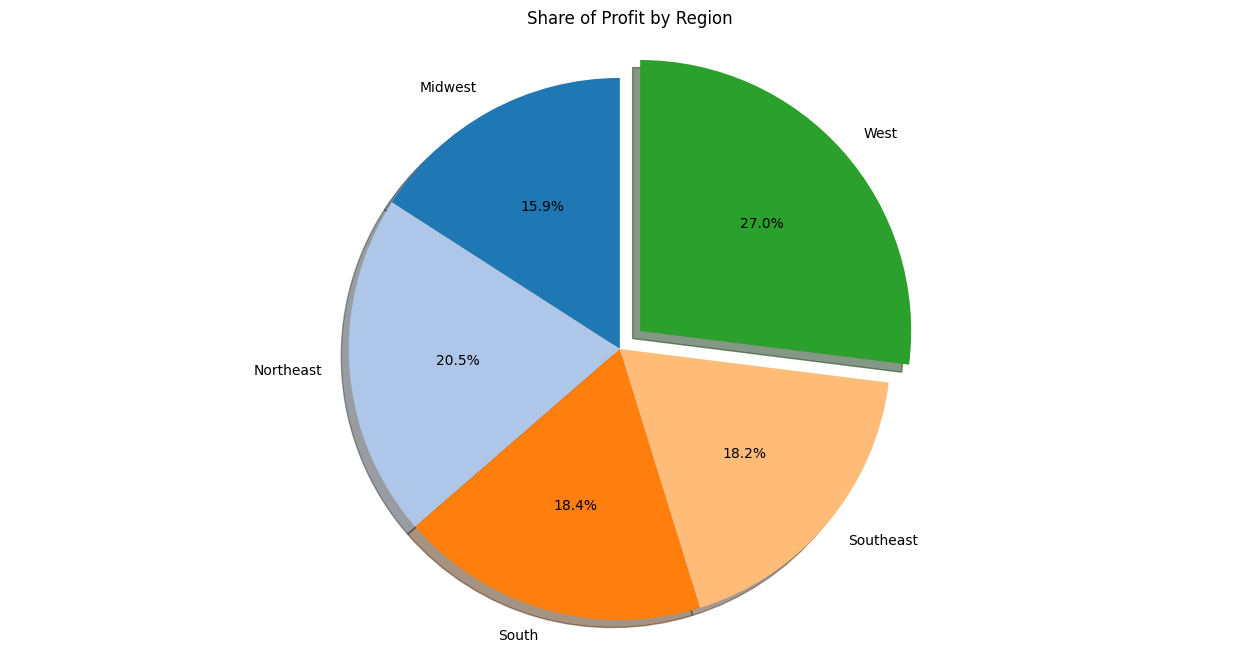

In [357]:
profit_by_region = df.groupby('Region')['Operating Profit'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
explode_index = profit_by_region.idxmax()
explode = [0.1 if retailer == explode_index else 0 for retailer in profit_by_region.index]
colors = plt.get_cmap('tab20').colors
ax.pie(profit_by_region, labels=profit_by_region.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=colors[:len(total_sales_by_retailer)])
ax.axis('equal')
ax.set_title('Share of Profit by Region')
plt.show()

In the total profit from the sale of Adidas products in the analyzed dataset, the largest share belongs to the **West** region with a total of **$89 609 406.55** which represents **27%** of the total profit.

<br>

### 12. What is the percentage of sales generated by men's products vs. women's products?

In [358]:
gender_sales = df.groupby('Gender')['Total Sales'].sum()
total_sales = gender_sales.sum()

men_sales_percentage = (gender_sales['Men'] / total_sales) * 100
women_sales_percentage = (gender_sales['Women'] / total_sales) * 100

men_sales_percentage, women_sales_percentage
print(f"Men's sales percentage: {men_sales_percentage:.2f}%")
print(f"Women's sales percentage: {women_sales_percentage:.2f}%")

Men's sales percentage: 54.03%
Women's sales percentage: 45.97%


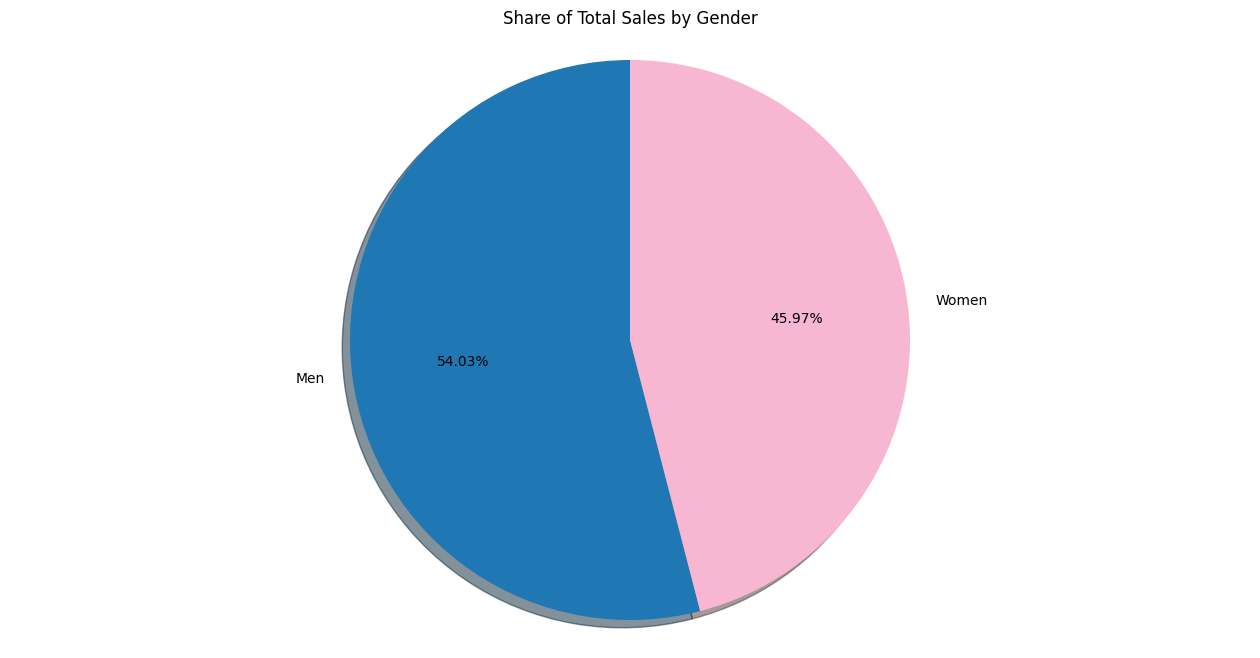

In [359]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]
ax.pie(gender_sales, labels=gender_sales.index, autopct='%1.2f%%', startangle=90, shadow=True, colors=colors)
ax.axis('equal')
ax.set_title('Share of Total Sales by Gender')
plt.show()

Men's products account for **54.03%** of the total sales, while women's products represent **45.97%**.

<br>

### 13. What is the trend in sales revenue over time?

In [360]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

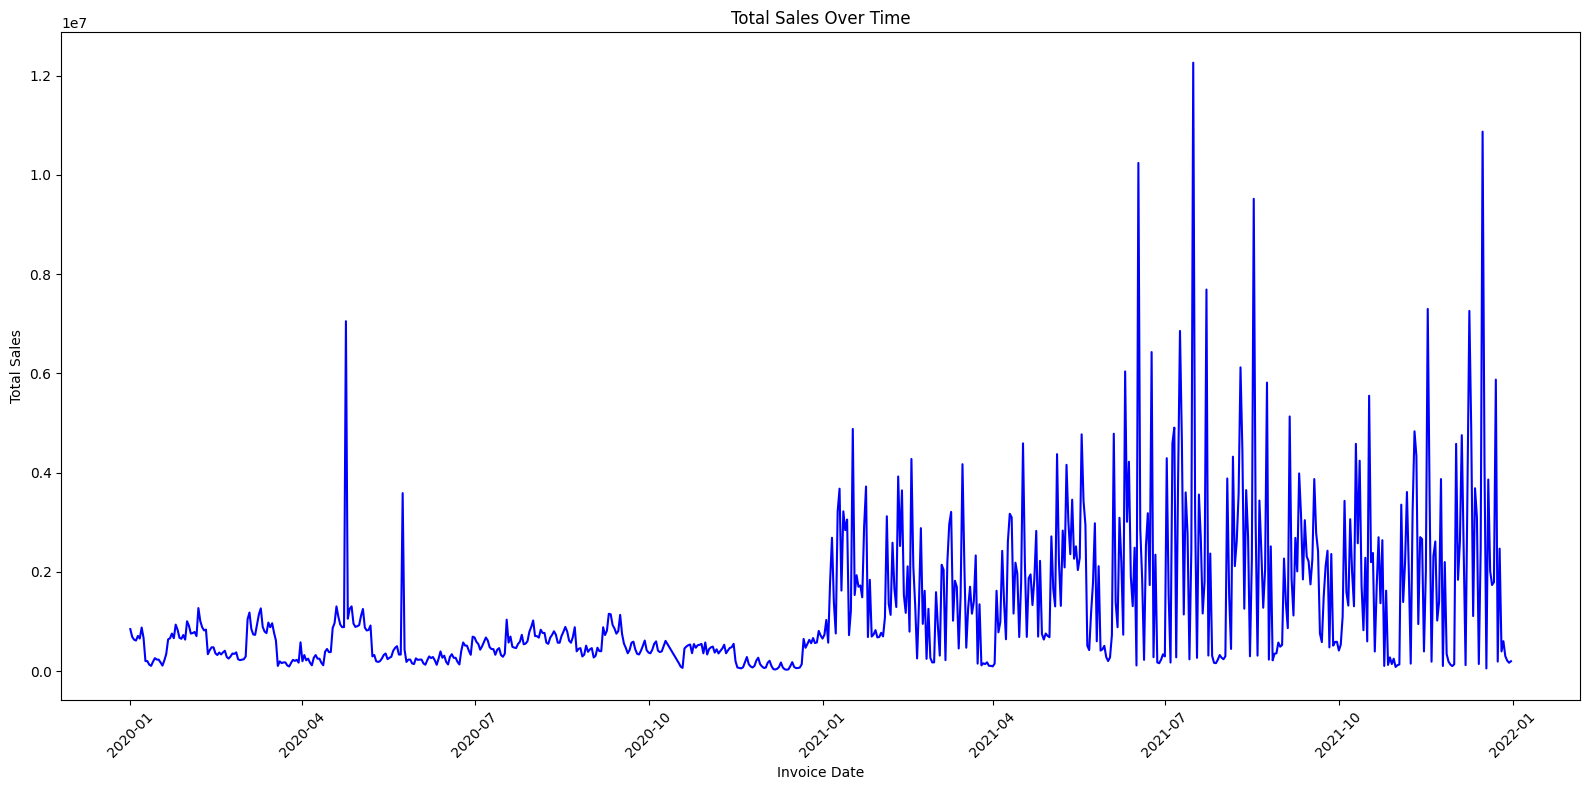

In [361]:
total_sales_date = df.groupby('Invoice Date')['Total Sales'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(total_sales_date.index, total_sales_date.values, linestyle='-', color='b')
ax.set_title('Total Sales Over Time')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the provided graph, the **trend in sales revenue over time** shows several key patterns:

- **Early 2020 to mid-2020:** Sales remain relatively low and consistent with minor fluctuations. The total sales are fairly stable until around **April 2020**, where two sharp spikes in sales are observed. These spikes could indicate special events or promotions that caused temporary surges in revenue.
  
- **Mid-2020 to late 2020:** After these peaks, the sales return to a lower, stable level for a few months, with relatively little fluctuation until around **late 2020**. During this time, the revenue is steady, with smaller peaks compared to the earlier spikes.

- **Late 2020 to early 2021:** Around **November 2020**, a clear upward trend begins, and the sales data show a noticeable increase in both the frequency and magnitude of revenue spikes. This could be associated with the holiday season or the implementation of more successful sales strategies. This upward momentum continues into **2021**, where sales revenue becomes more volatile, with more frequent and higher peaks, indicating **increased sales activity**.

- **2021 to early 2022:** Sales volatility remains high, with multiple large spikes, suggesting the retailer experienced periods of **intense sales activity**, potentially due to marketing campaigns, new product launches, or seasonal demands. The overall trend during this period reflects **increased revenue and heightened market activity**.

In summary, **sales revenue exhibits a sharp rise in volatility and volume starting in late 2020**, indicating a period of growth and increased sales efforts. The **strong peaks in sales** suggest periodic promotions or events, while the overall upward trend implies a sustained growth in revenue over time.

<br>

### 14. What is the average total sales per retailer?

In [362]:
df.groupby('Retailer')['Total Sales'].mean().round(2)

Retailer
Amazon            81874.51
Foot Locker       83590.85
Kohl's            99140.54
Sports Direct     89798.72
Walmart          119102.89
West Gear        102343.86
Name: Total Sales, dtype: float64

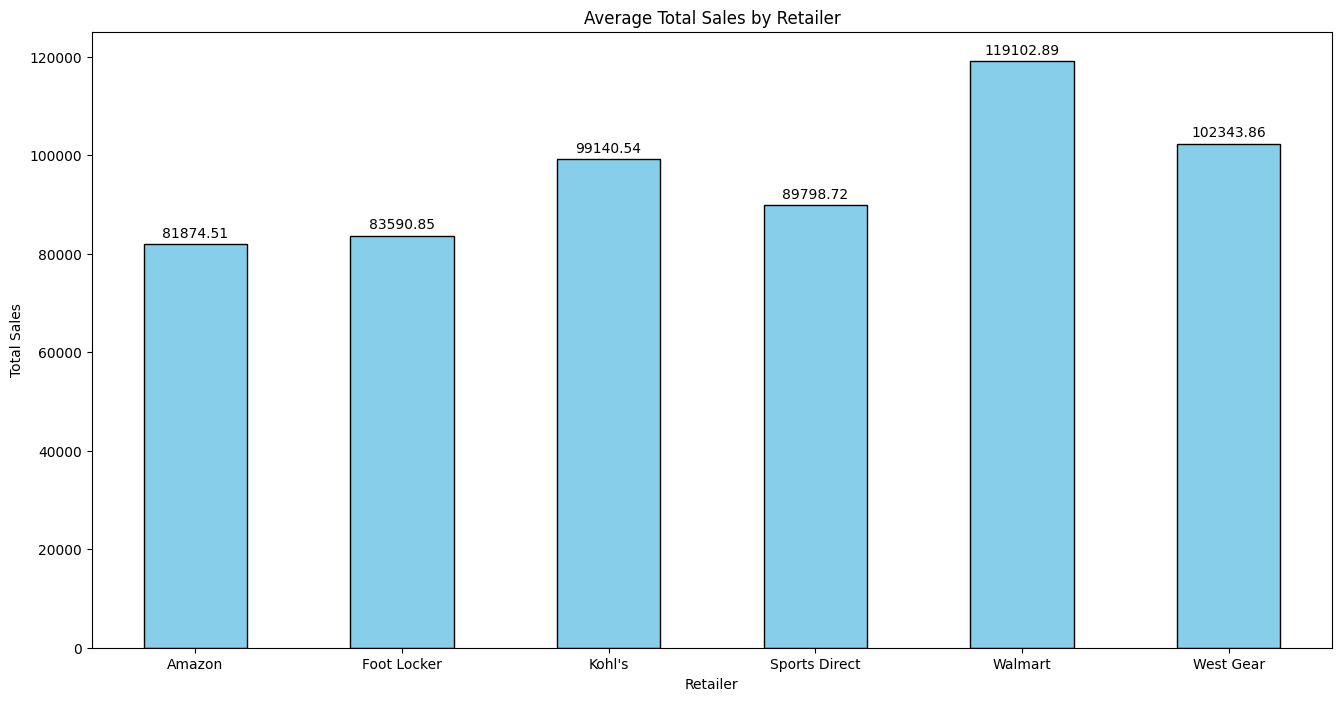

In [363]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Total Sales'].mean().round(2).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The average total sales figures are as follows: **Amazon** with **$81 874.51**, **Foot Locker** with **$83 464.06**, **Kohl's** with **$99 140.54**, **Sports Direct** with **$89 798.72**, **Walmart** with **$119 102.89** and **West Gear** with **$102 343.86**.

<br>


### 15. Which state generates the highest total sales?

In [364]:
df.groupby('State')['Total Sales'].sum().nlargest(1)

State
New York    64229039.0
Name: Total Sales, dtype: float64

Among the states listed, **New York** generates the highest total sales, amounting to **$64 229 039**. This figure highlights New York as the leading state in terms of total sales performance.

<br>

### 16. What is the distribution of sales across different sales methods (in-store vs. online)?

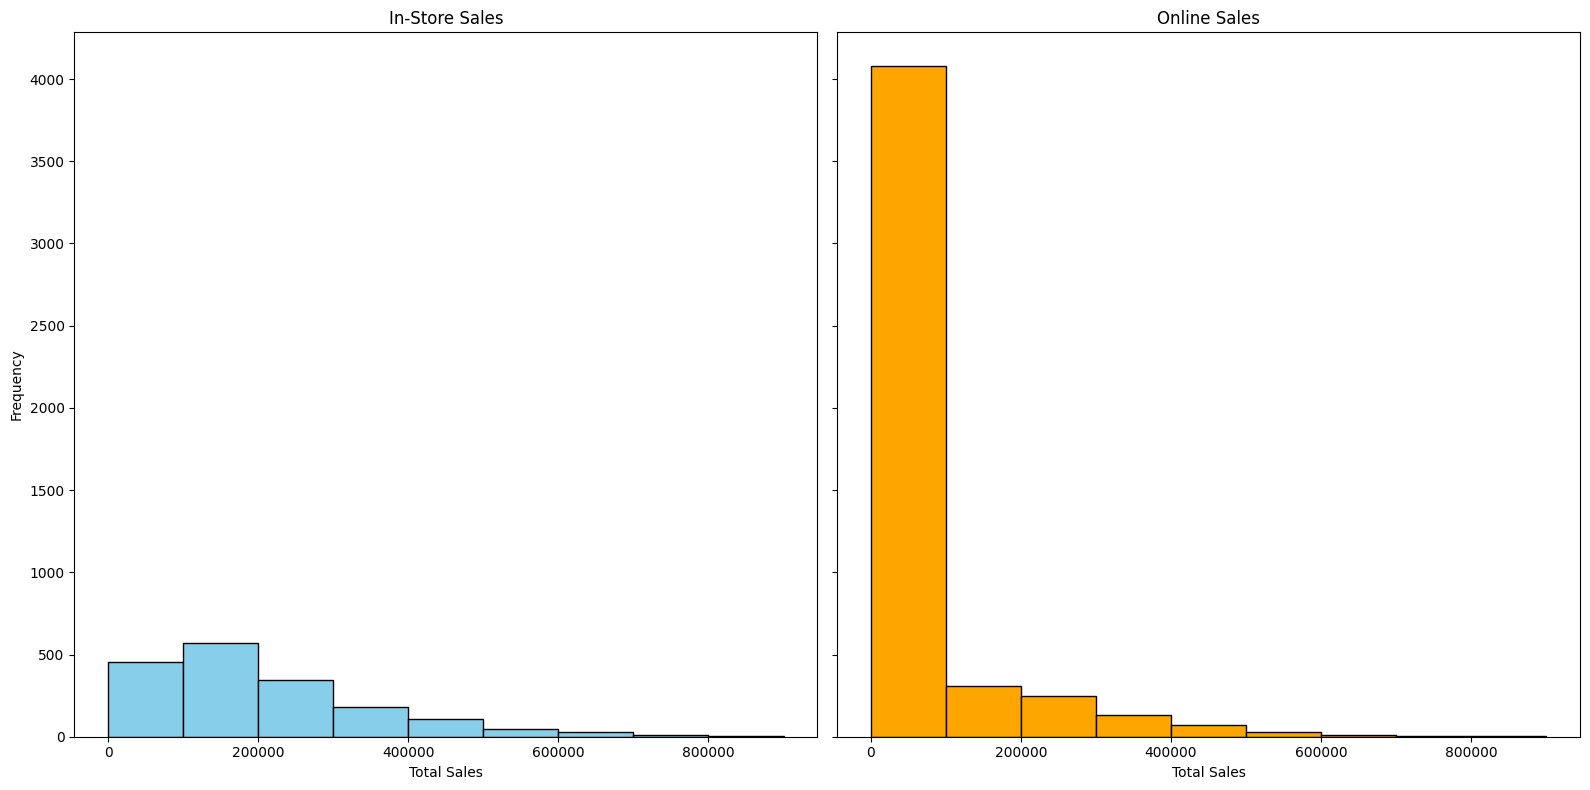

In [365]:
in_store_sales = df[df['Sales Method'] == 'In-store']['Total Sales']
online_sales = df[df['Sales Method'] == 'Online']['Total Sales']

max_sales = int(df['Total Sales'].max())
bins = list(range(0, max_sales + 100000, 100000))

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axes[0].hist(in_store_sales, bins=bins, color='skyblue', edgecolor='black')
axes[0].set_title('In-Store Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Frequency')

axes[1].hist(online_sales, bins=bins, color='orange', edgecolor='black')
axes[1].set_title('Online Sales')
axes[1].set_xlabel('Total Sales')

plt.tight_layout()
plt.show()

For **in-store sales** (left histogram), the distribution shows a wider range of total sales. The frequency of sales is highest in the lower ranges, specifically below $200,000, with a gradual decrease as the sales totals increase. There are fewer instances of in-store sales above $400,000, with some outliers reaching closer to $800,000. This suggests that while in-store sales are more frequent in the lower revenue brackets, some higher-value transactions do occur.

In contrast, the **online sales** (right histogram) exhibit a much more skewed distribution. The vast majority of online transactions fall within the very low sales range, predominantly under $200,000, with a sharp drop-off as sales totals increase. Very few transactions surpass the $200,000 mark, and only a handful of outliers extend towards $800,000. This indicates that online sales tend to be more concentrated in smaller amounts compared to in-store sales.

<br>

### 17. Which product category has the highest average operating margin?

In [366]:
df.groupby('Category')['Operating Margin'].mean().round(3)

Category
Apparel              0.427
Athletic Footwear    0.413
Street Footwear      0.428
Name: Operating Margin, dtype: float64

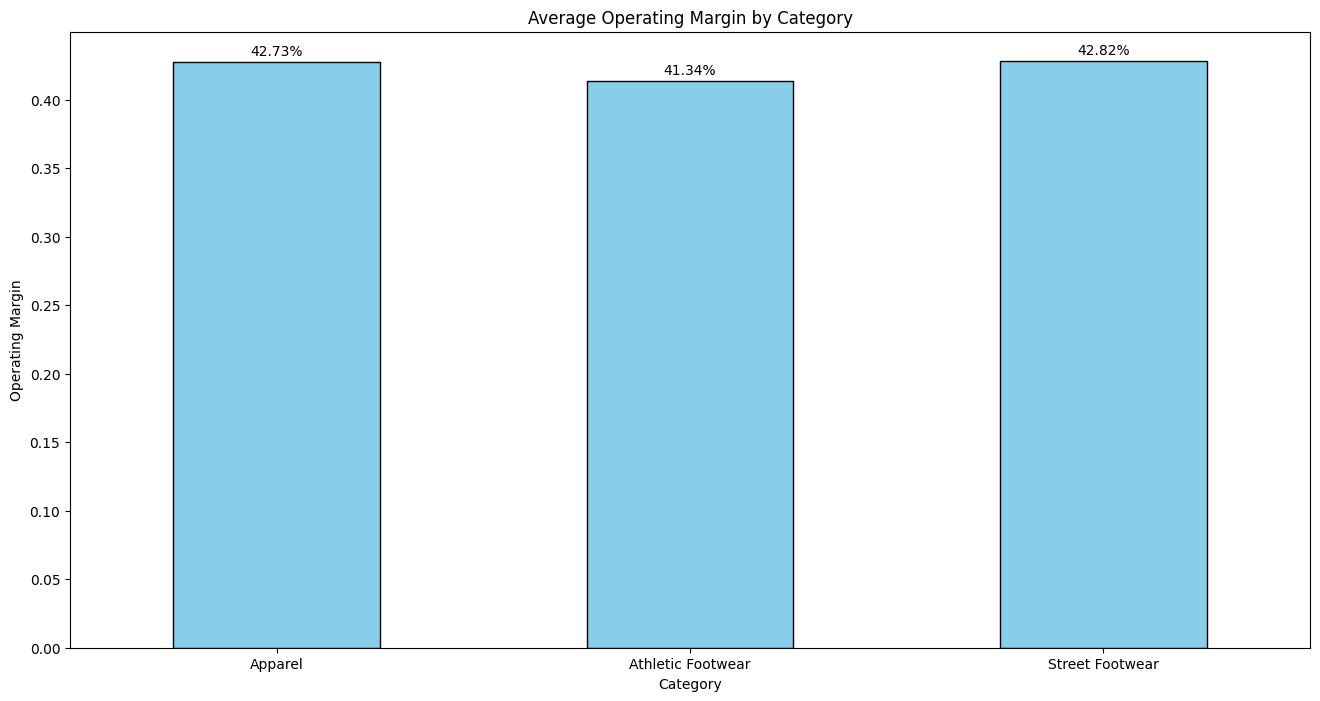

In [367]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Operating Margin'].mean().round(4).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Operating Margin by Category')
plt.xlabel('Category')
plt.ylabel('Operating Margin')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height() * 100:.2f}%',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The product category with the highest average operating margin is **Street Footwear**, with an average operating margin of **42.82%**.

<br>

### 18. What is the total number of units sold across all retailers?

In [368]:
df.groupby('Retailer')['Units Sold'].sum()

Retailer
Amazon           197990
Foot Locker      604369
Kohl's           287375
Sports Direct    557640
Walmart          206225
West Gear        625262
Name: Units Sold, dtype: int64

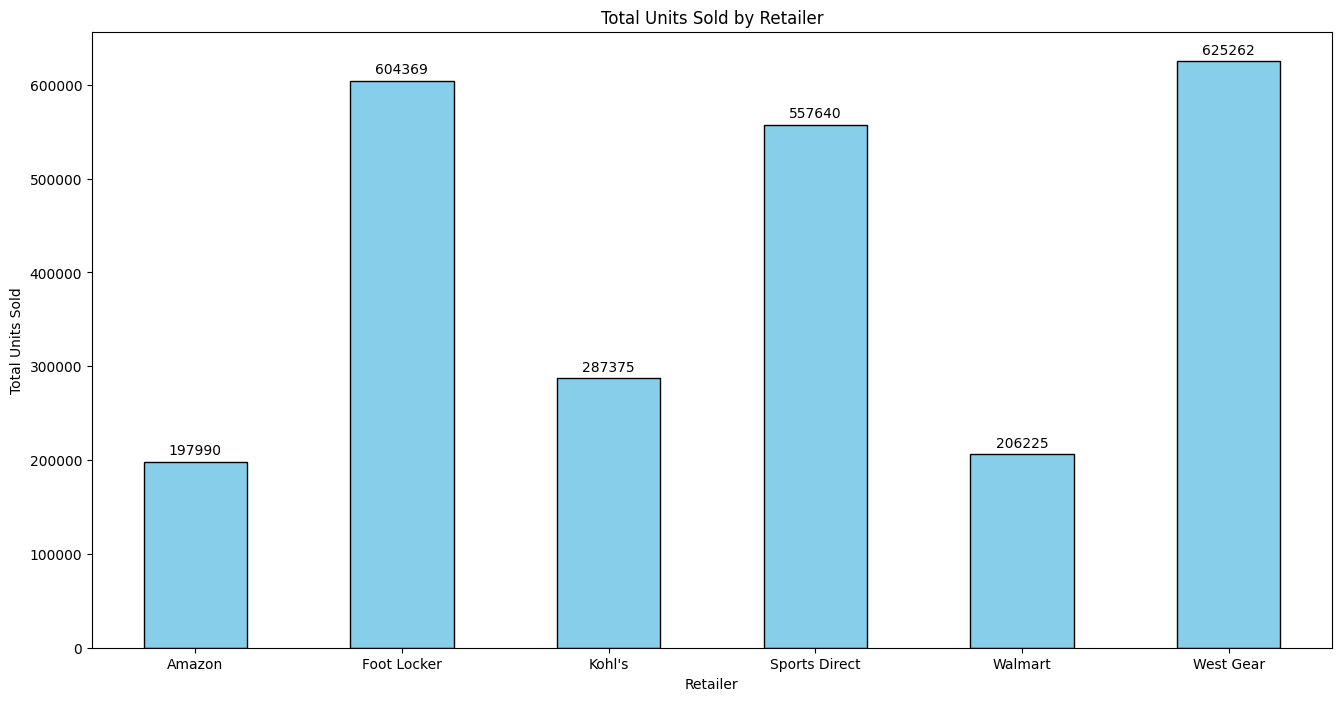

In [369]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Units Sold by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The total number of units sold across all retailers is **2 478 861** units. This is the sum of units sold by Amazon (197 990), Foot Locker (604 369), Kohl's (287 375), Sports Direct (557 640), Walmart (206 225), and West Gear (625 262).

<br>

### 19. How does total sales compare between footwear and apparel?

In [370]:
apparel_sales = df[df['Category'] == 'Apparel']['Total Sales'].sum()
footwear_sales = df[df['Category'] != 'Apparel']['Total Sales'].sum()

print(f"The total sales for apparel is {apparel_sales:.0f} and for footwear is {footwear_sales:.0f}.")

The total sales for apparel is 302767492 and for footwear is 597134633.


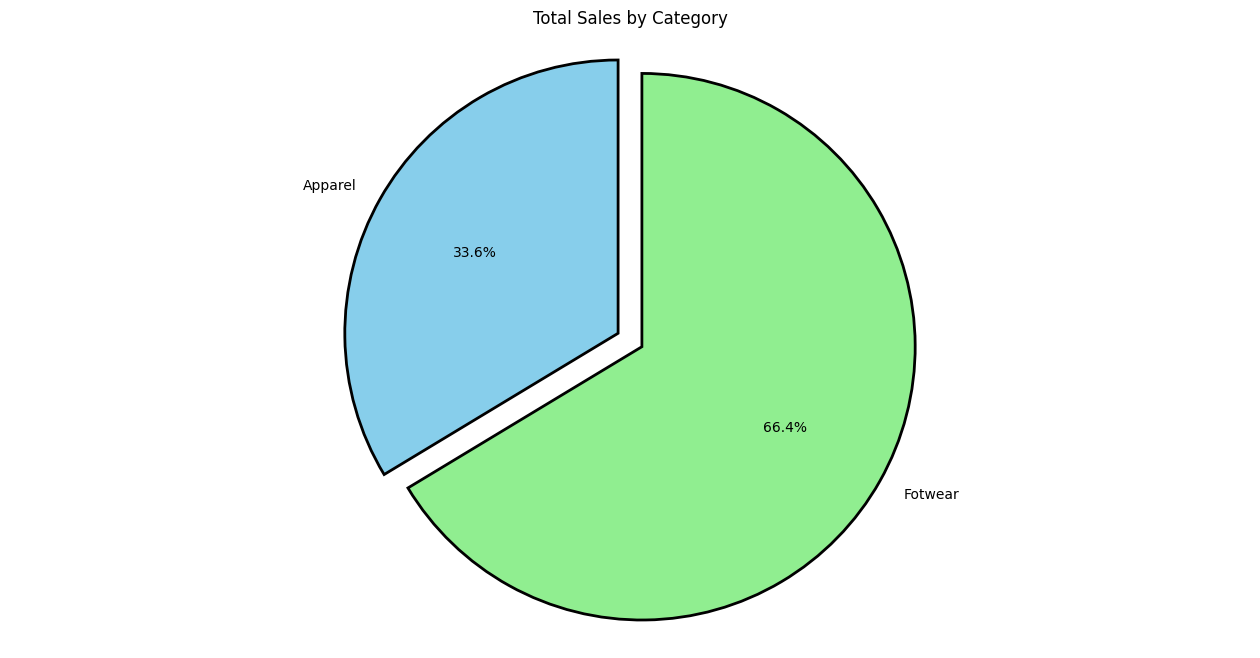

In [371]:
labels = ['Apparel', 'Fotwear']
sizes = [apparel_sales, footwear_sales]
colors = ['skyblue', 'lightgreen']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(16, 8))
ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
ax.axis('equal')
ax.set_title('Total Sales by Category')

plt.show()

The total sales for **footwear** significantly exceed those for **apparel**. Footwear generated **$597 134 633**, while apparel contributed **$302 767 492**. This indicates that footwear sales are nearly double the sales of apparel, highlighting footwear as the stronger revenue driver between the two categories.

<br>

### 20. What is the highest total sales recorded for a single invoice?

In [372]:
df[df['Total Sales'] == df['Total Sales'].max()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Category
1394,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,110.0,750,825000.0,371250.0,0.45,In-store,Women,Apparel
1970,West Gear,1128299,2021-06-17,South,Louisiana,New Orleans,Women's Apparel,110.0,750,825000.0,288750.0,0.35,Online,Women,Apparel


The highest total sales recorded for a single invoice is **$825 000**.

<br>

### 21. How many unique products are sold across all retailers?

In [373]:
df.groupby('Retailer')['Product'].nunique()

Retailer
Amazon           6
Foot Locker      6
Kohl's           6
Sports Direct    6
Walmart          6
West Gear        6
Name: Product, dtype: int64

There are **6 unique products** sold across all retailers, as each retailer offers the same set of products.

<br>

### 22. What is the most profitable region in terms of profit?

In [374]:
df.groupby('Region')['Operating Profit'].sum()

Region
Midwest      52811346.48
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
West         89609406.55
Name: Operating Profit, dtype: float64

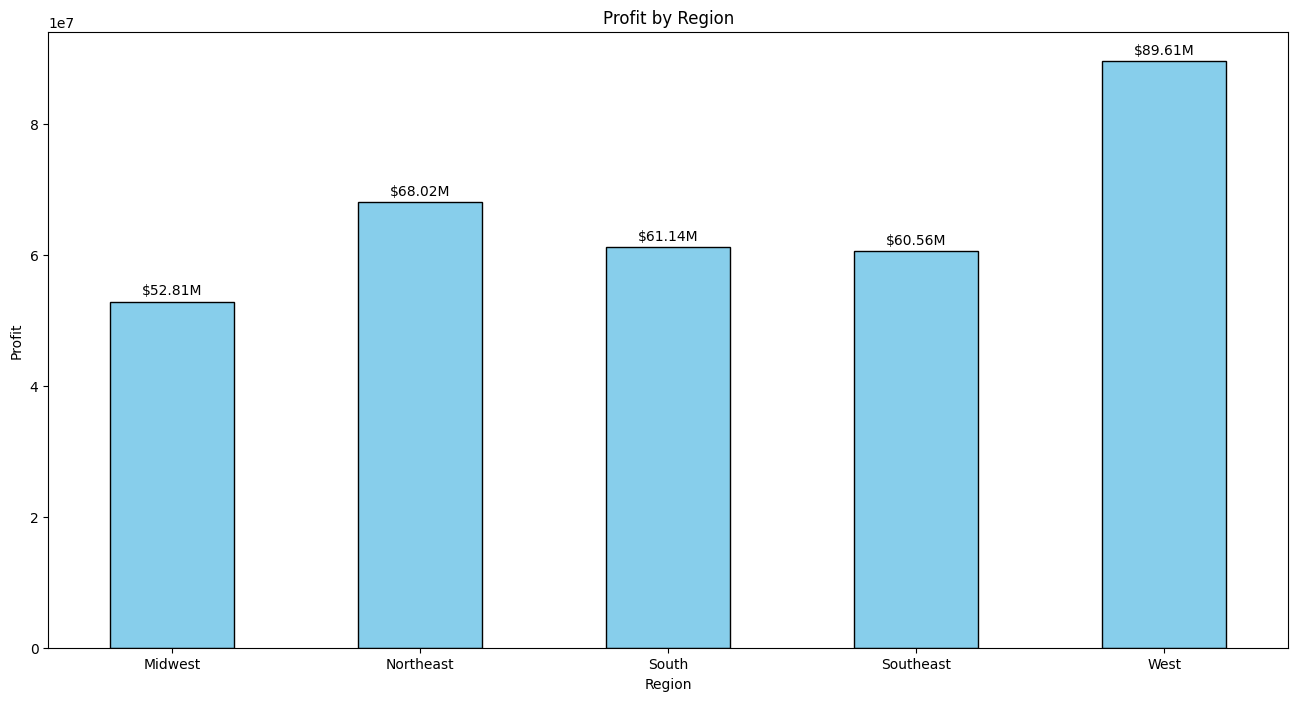

In [375]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The most profitable region in terms of profit is the **West**, with a total profit of **$89 609 406.55**.

<br>

### 23. What is the total number of invoices for each retailer?

In [376]:
df['Retailer'].value_counts()

Retailer
Foot Locker      2633
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

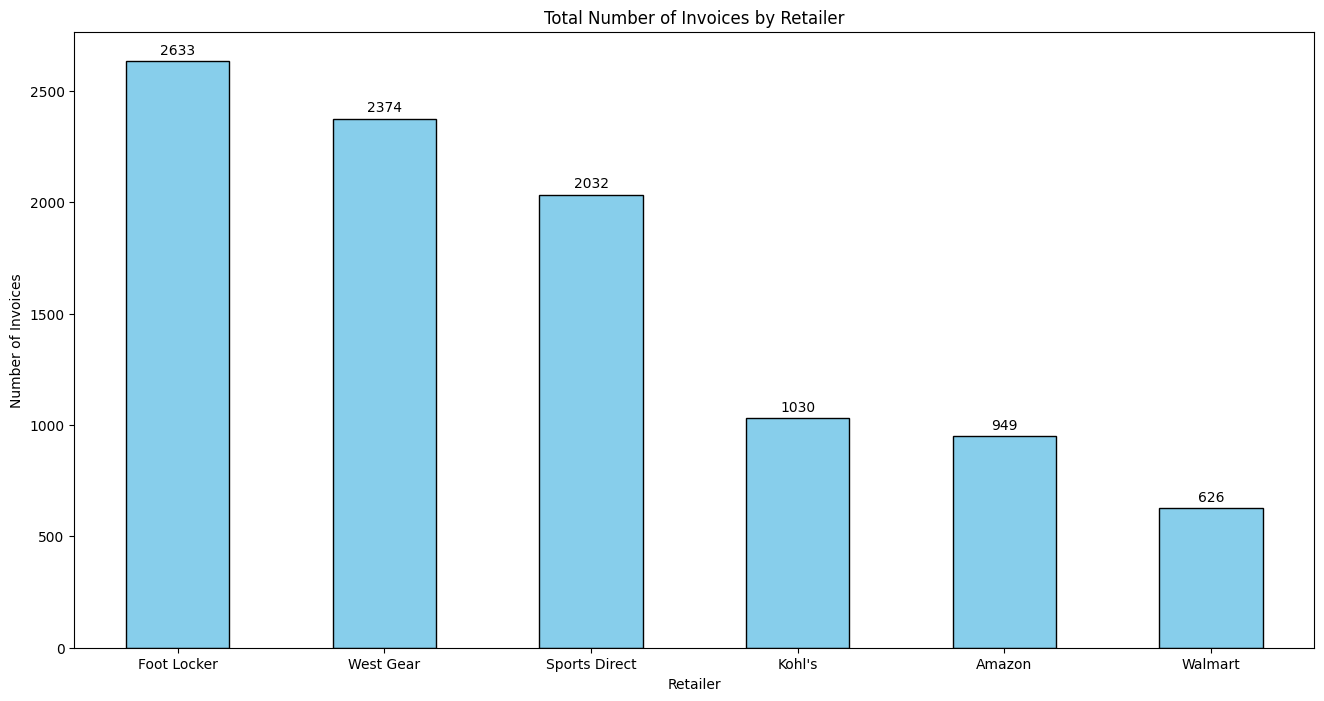

In [377]:
plt.figure(figsize=(16, 8))
bars = df['Retailer'].value_counts().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Number of Invoices by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The total number of invoices for each retailer is as follows: **Foot Locker** has **2 637 invoices**, **West Gear** has **2 374**, **Sports Direct** has **2 032**, **Kohl's** has **1 030**, **Amazon** has **949**, and **Walmart** has **626** invoices.

<br>

### 24. What is the overall percentage contribution of each product category to total sales?

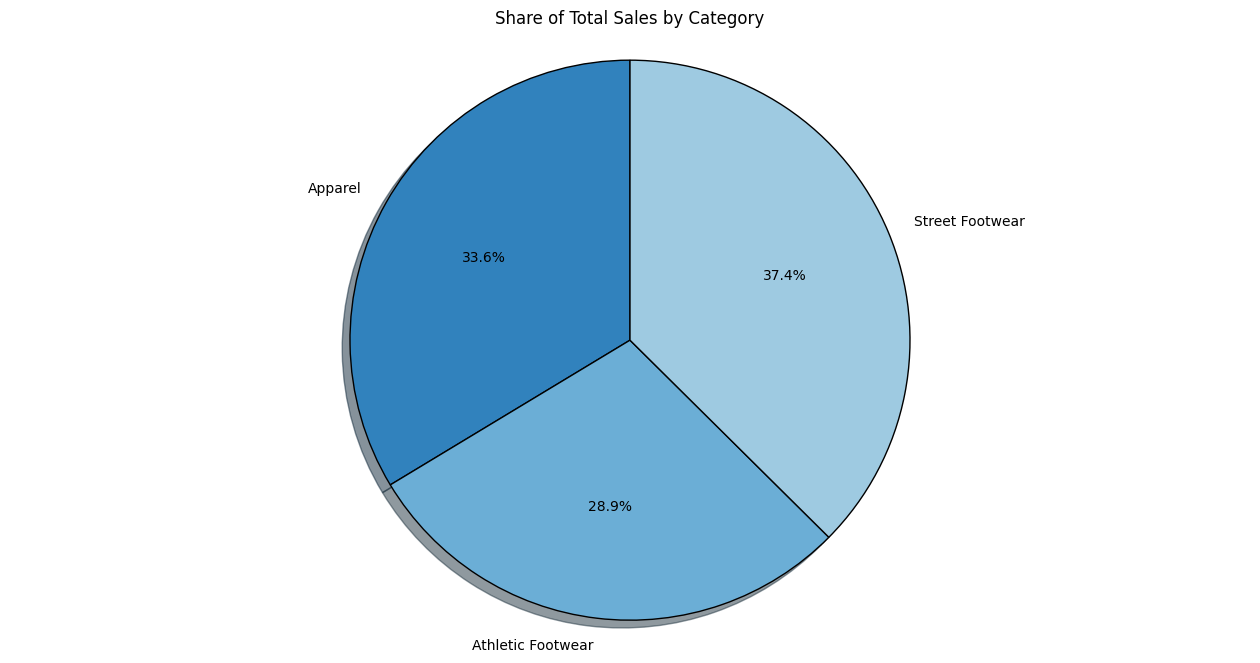

In [378]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = plt.get_cmap('tab20c').colors
ax.pie(df.groupby('Category')['Total Sales'].sum(), labels=df.groupby('Category')['Total Sales'].sum().index, autopct='%1.1f%%', startangle=90, shadow=True, colors=colors[:len(total_sales_by_retailer)], wedgeprops={'edgecolor': 'black'})
ax.axis('equal')
ax.set_title('Share of Total Sales by Category')
plt.show()

The largest contributor is **Street Footwear**, which accounts for **37.4%** of the total sales. This is followed by **Apparel**, contributing **33.6%**, and **Athletic Footwear**, making up **28.9%** of the total sales. These proportions show that Street Footwear has the largest share, followed by Apparel, with Athletic Footwear contributing the smallest share among the three categories.

<br>

## Profit and Margin Analysis

### 25. What is the total operating profit generated across all retailers?

In [379]:
df.groupby('Retailer')['Operating Profit'].sum()

Retailer
Amazon           28818503.31
Foot Locker      80722124.81
Kohl's           36811252.58
Sports Direct    74332954.96
Walmart          25782052.61
West Gear        85667873.18
Name: Operating Profit, dtype: float64

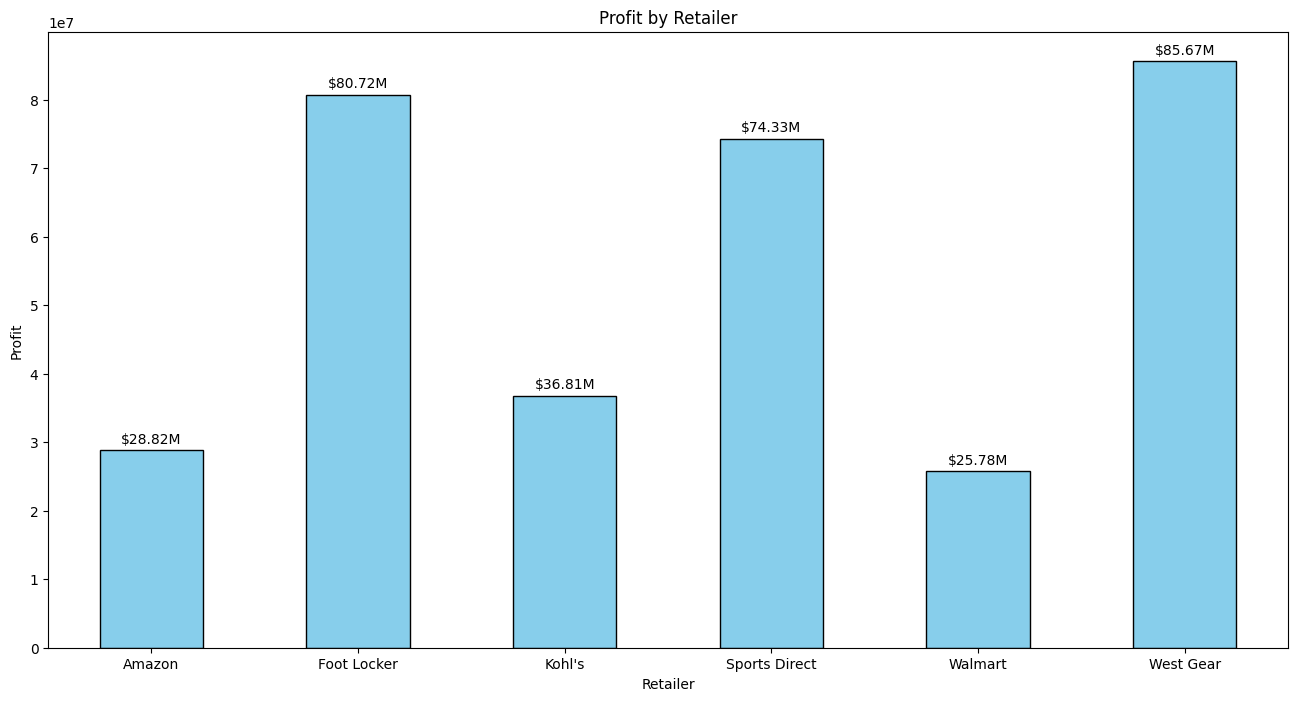

In [380]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The total operating profit generated across all retailers is **$332,934,761.45**. This is the sum of the operating profits from Amazon ($28,818,503.31), Foot Locker ($80,722,124.81), Kohl's ($36,811,252.58), Sports Direct ($74,332,954.96), Walmart ($25,782,052.61), and West Gear ($85,667,873.18).

<br>

### 26. Which retailer has the highest total operating profit?

In [381]:
df.groupby('Retailer')['Operating Profit'].sum().nlargest(1)

Retailer
West Gear    85667873.18
Name: Operating Profit, dtype: float64

The retailer with the highest total operating profit is **West Gear**, with an operating profit of **$85,667,873.18**.

<br>

### 27. What is the average operating margin for each product category?

In [382]:
df.groupby('Category')['Operating Margin'].mean().round(3)

Category
Apparel              0.427
Athletic Footwear    0.413
Street Footwear      0.428
Name: Operating Margin, dtype: float64

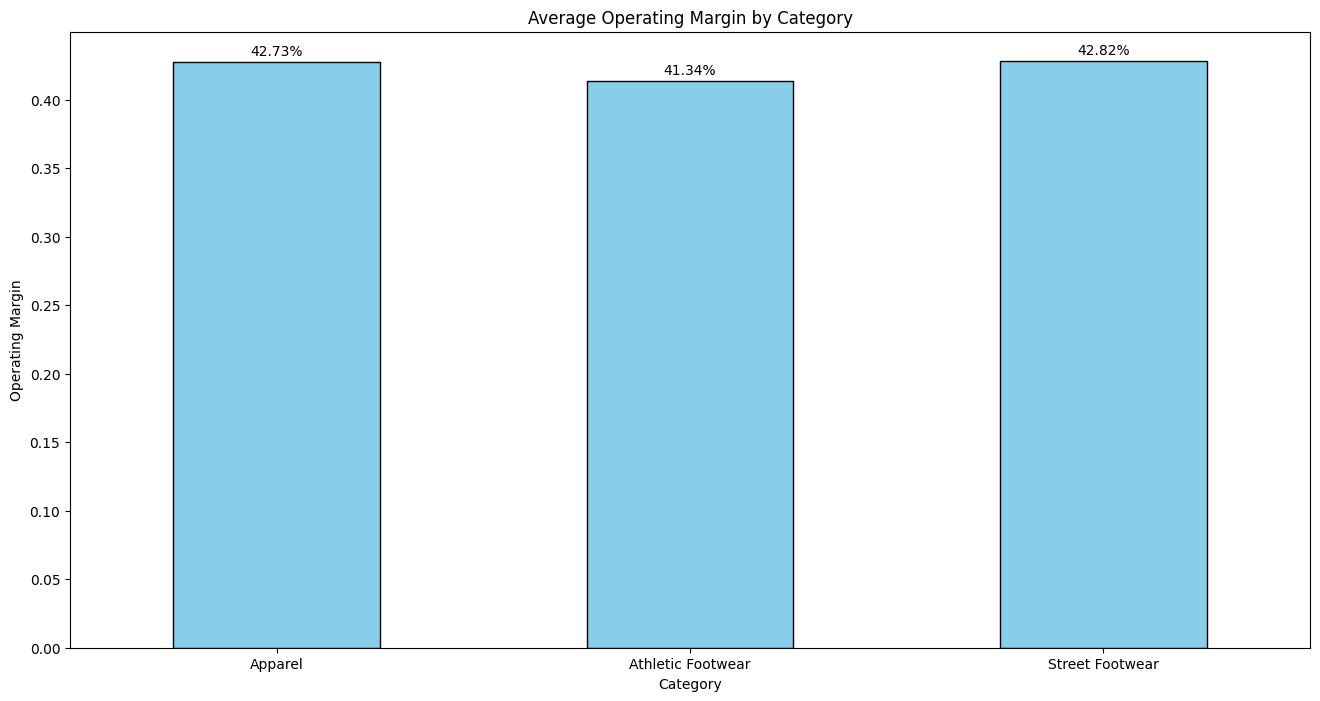

In [383]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Operating Margin'].mean().round(4).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Operating Margin by Category')
plt.xlabel('Category')
plt.ylabel('Operating Margin')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height() * 100:.2f}%',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The average operating margin for each product category is **42.7%** for **apparel**, **41.4%** for **athletic footwear** and **42.8%** for **street footwear**. This indicates that street footwear has the highest average operating margin, followed closely by apparel, with athletic footwear having the lowest margin.

<br>

### 28. How does operating profit vary by sales method?

In [384]:
df.groupby('Sales Method')['Operating Profit'].sum()

Sales Method
In-store    1.275913e+08
Online      9.655518e+07
Outlet      1.079883e+08
Name: Operating Profit, dtype: float64

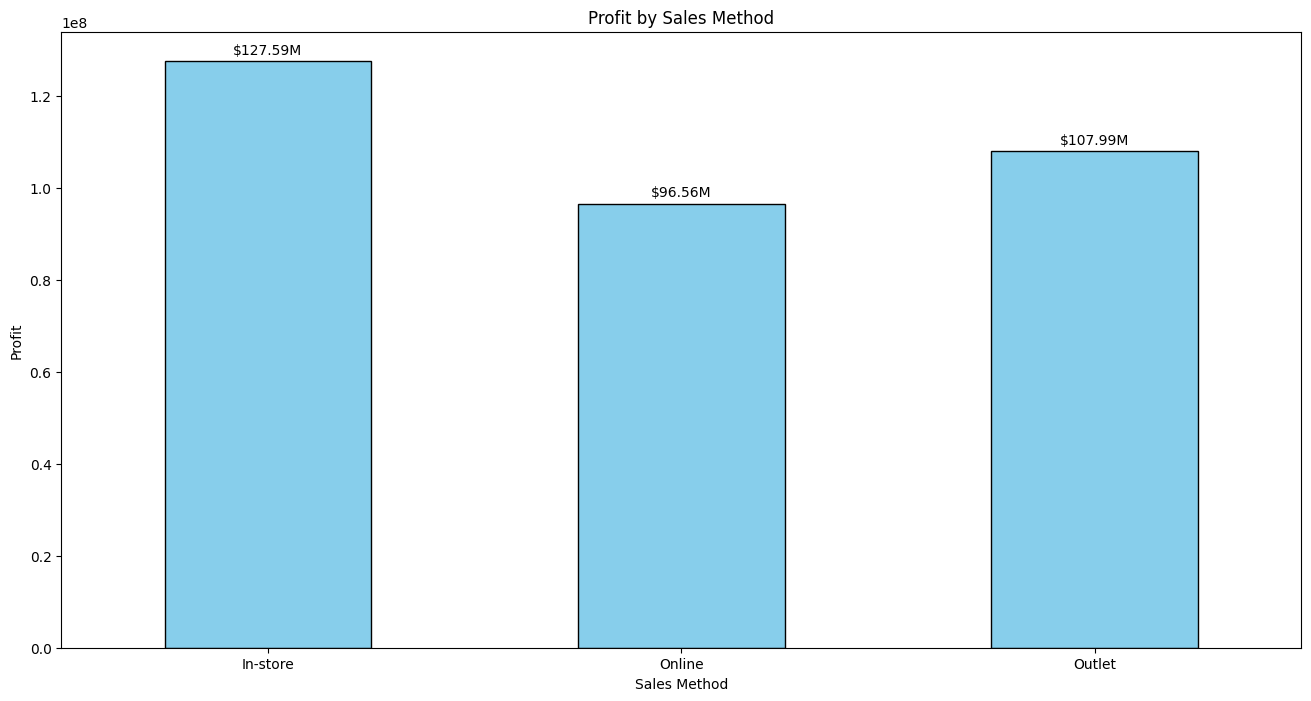

In [385]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Sales Method')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

Operating profit varies significantly by sales method. **In-store sales** generate the highest operating profit, amounting to **$127.59 million**, followed by **outlet sales** with a profit of **$107.99 million**. **Online sales** contribute the lowest operating profit, totaling **$96.56 million**. This indicates that traditional in-store and outlet sales are more profitable compared to online sales.

<br>

### 29. What is the highest operating margin recorded for a single transaction?

In [386]:
df[df['Operating Margin'] == df['Operating Margin'].max()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Category
5005,Sports Direct,1197831,2021-09-11,South,Alabama,Birmingham,Women's Apparel,56.0,240,13440.0,10752.0,0.8,Online,Women,Apparel
5035,Sports Direct,1197831,2021-10-11,South,Alabama,Birmingham,Women's Apparel,68.0,203,13804.0,11043.2,0.8,Online,Women,Apparel


The highest operating margin recorded for a single transaction is **80%**.

<br>

### 30. How does the operating profit differ across different states?

In [387]:
df.groupby('State')['Operating Profit'].sum()

State
Alabama            9147581.39
Alaska             4498345.86
Arizona            5344664.58
Arkansas           4915697.91
California        19301170.40
Colorado           7713555.83
Connecticut        4152320.79
Delaware           4524350.06
Florida           20926206.92
Georgia            6893289.61
Hawaii             5849794.07
Idaho              8121115.10
Illinois           3920368.61
Indiana            3379256.00
Iowa               2655217.37
Kansas             3510147.29
Kentucky           3935830.23
Louisiana          9417233.49
Maine              3187654.37
Maryland           2757642.12
Massachusetts      3353875.87
Michigan           8135894.02
Minnesota          2670229.76
Mississippi        6369094.73
Missouri           3907209.36
Montana            6232037.55
Nebraska           2439478.41
Nevada             7060651.92
New Hampshire      5786206.43
New Jersey         3657237.22
New Mexico         6738060.41
New York          23329824.07
North Carolina     9756422.87
Nort

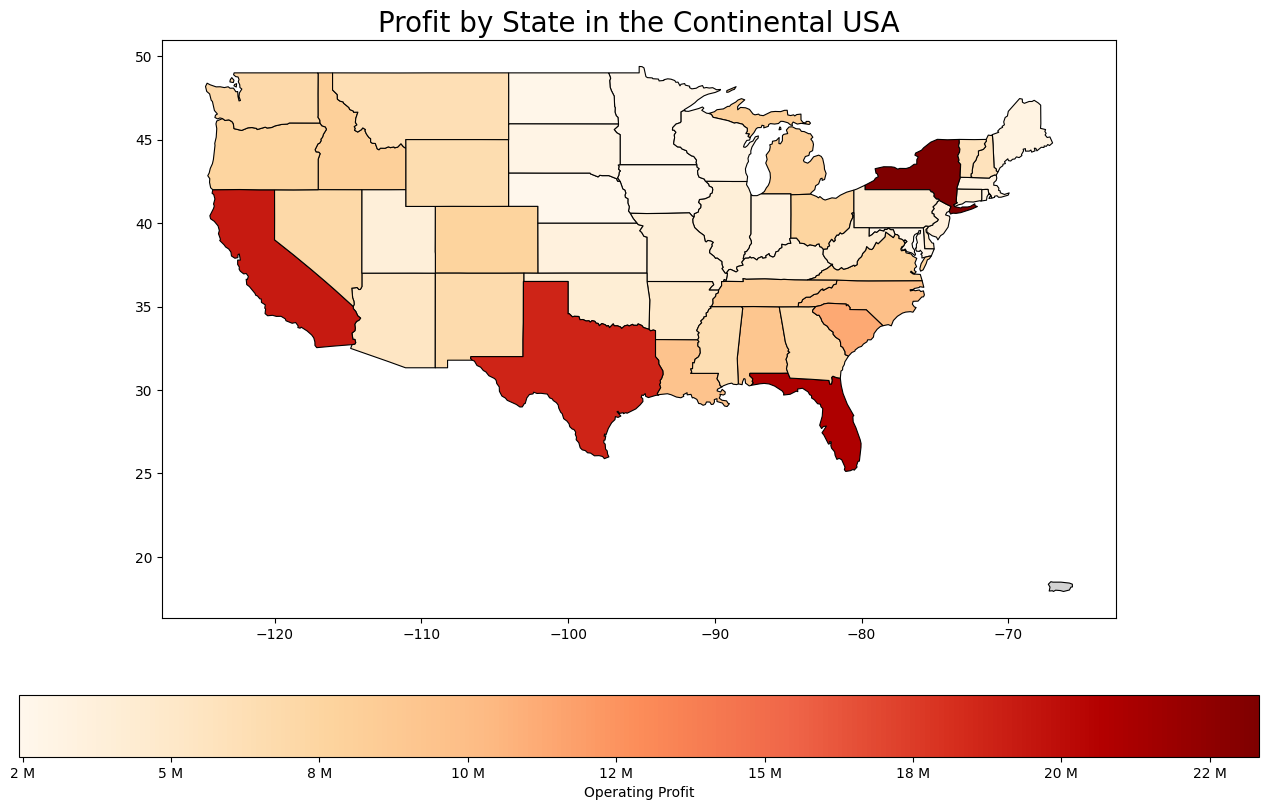

In [388]:
import geopandas as gpd
import matplotlib as mpl

states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
states['name'] = states['name'].str.title()
grouped_df['State'] = grouped_df['State'].str.title()
states = states[~states['name'].isin(['Alaska', 'Hawaii'])]
states = states.merge(grouped_df, how='left', left_on='name', right_on='State')

missing_color = 'lightgrey'
vmin, vmax = grouped_df['Operating Profit'].min(), grouped_df['Operating Profit'].max()

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
states.plot(column='Operating Profit', ax=ax, legend=False, cmap='OrRd', edgecolor='black', linewidth=0.8,
            missing_kwds={'color': missing_color, 'label': 'No data'}, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation="horizontal", pad=0.1)
cbar.set_label("Operating Profit")

def format_func(value, tick_number):
    if value >= 1e6:
        return f'{value * 1e-6:.0f} M'
    elif value >= 1e3:
        return f'{value * 1e-3:.0f} K'
    else:
        return f'{value:.0f}'

cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.title('Profit by State in the Continental USA', fontsize=20)
plt.show()


Based on the color intensity from the gradient scale, it is evident that states like **California**, **Texas**, **Florida**, and **New York** contribute significantly higher operating profits, represented by the darker red shading. States with lighter shading, such as those in the Midwest and certain northern states, show comparatively lower operating profit contributions.

The legend indicates that the highest profits range around **22 million**, while the lower end of the spectrum starts at around **2 million**.

<br>

### 31. Which product category has the lowest average operating margin?

In [389]:
df.groupby('Category')['Operating Margin'].mean().round(3)

Category
Apparel              0.427
Athletic Footwear    0.413
Street Footwear      0.428
Name: Operating Margin, dtype: float64

The product type with the lowest average operating margin is **Athletic Footwear**, with an average margin of **41.4%**.

<br>

### 32. What is the overall operating margin for the entire dataset?

In [390]:
df['Operating Margin'].mean().round(3)

0.423

The overall operating margin for the entire dataset is **42.3%**.

<br>

### 33. What is the relationship between price per unit and operating margin?

In [391]:
df['Price per Unit'].corr(df['Operating Margin']).round(2)

-0.14

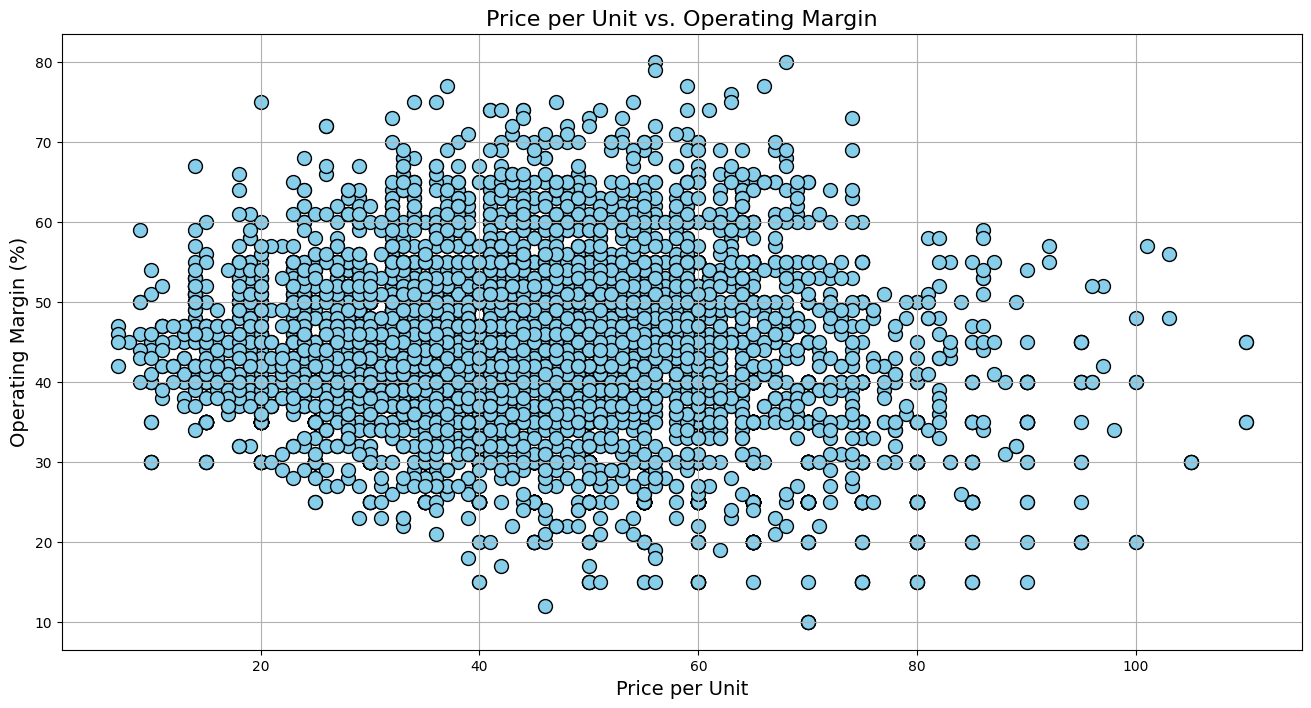

In [392]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df['Price per Unit'], df['Operating Margin'] * 100, color='skyblue', edgecolor='black', s=100)
ax.set_title('Price per Unit vs. Operating Margin', fontsize=16)
ax.set_xlabel('Price per Unit', fontsize=14)
ax.set_ylabel('Operating Margin (%)', fontsize=14)
ax.grid(True)
plt.show()

The correlation coefficient between these two variables is **-0.14**, which indicates a **weak negative relationship**. In practical terms, this suggests that there is **no strong linear relationship** between the price per unit and the operating margin, meaning changes in price do not reliably predict changes in the operating margin. The points are widely scattered across the graph, further supporting the lack of a clear correlation.

<br>

### 34. How do operating margins vary by retailer?

In [393]:
(df.groupby('Retailer')['Operating Margin'].mean().round(5) * 100).astype(str) + '%'

Retailer
Amazon                       41.787%
Foot Locker                  41.785%
Kohl's                       41.929%
Sports Direct    44.489000000000004%
Walmart                      40.653%
West Gear                    41.786%
Name: Operating Margin, dtype: object

Average operating margins vary by retailer as follows: **Amazon** has a margin of **41.79%**, **Foot Locker** has **41.79%**, **Kohl's** has **41.93%**, **Sports Direct** has **44.49%**, **Walmart** has **40.65%**, and **West Gear** has **41.79%**. Overall, the margins are very similar, with **Sports Direct** standing out due to its notably higher margin of **44.49%**, while **Walmart** has the lowest at **40.65%**.

<br>

### 35. What is the operating profit contribution from men’s vs. women’s products?

In [394]:
men_profit = df[df['Gender'] == 'Men']['Operating Profit'].sum()
women_profit = df[df['Gender'] == 'Women']['Operating Profit'].sum()

print(f"The total profit for men's products is ${men_profit / 1000000:.1f} M and for women's products is ${women_profit / 1000000:.1f} M.")

The total profit for men's products is $179.4 M and for women's products is $152.7 M.


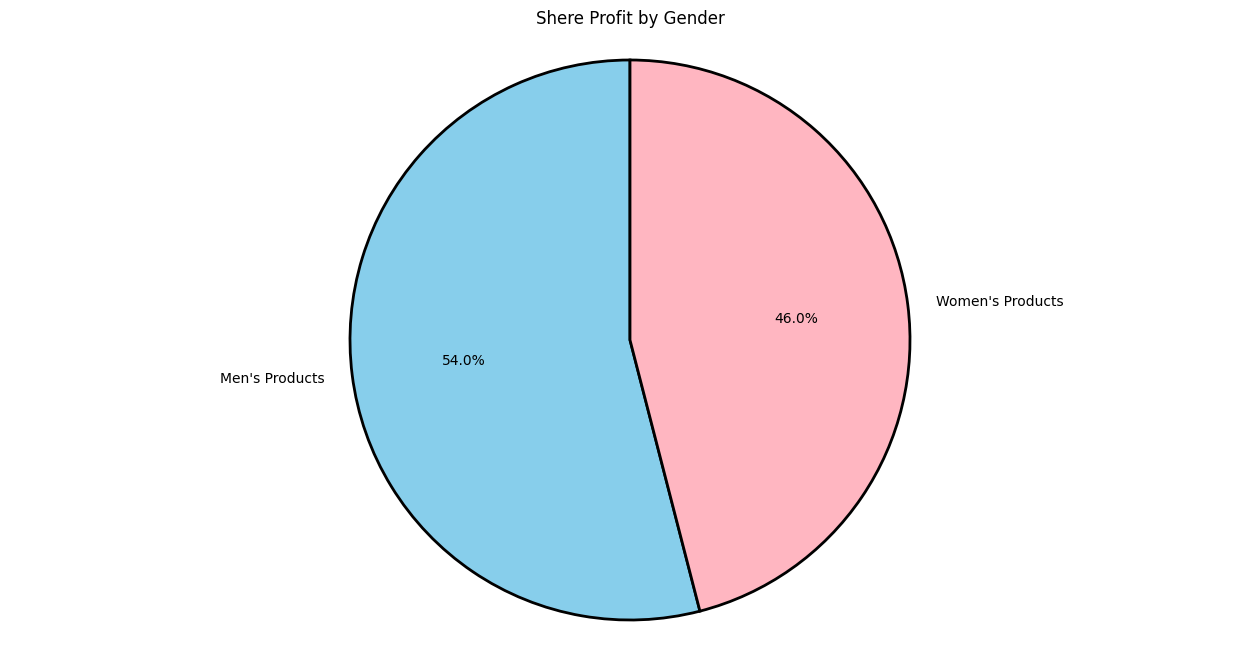

In [395]:
labels = ["Men's Products", 'Women\'s Products']
sizes = [men_profit, women_profit]
colors = ['skyblue', 'lightpink']

fig, ax = plt.subplots(figsize=(16, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
ax.axis('equal')
ax.set_title('Shere Profit by Gender')

plt.show()

The operating profit contribution from men's products is **$179.4 million (54%)**, while the contribution from women's products is **$152.7 million (46%)**.

<br>

### 36. What is the average operating margin for footwear products?

In [396]:
df[df['Category'] != 'Apparel']['Operating Margin'].mean().round(3)

0.421

The average operating margin for footwear products is **42.1%**.

<br>

### 37. How does operating profit compare between athletic and street footwear?

In [397]:
df[df['Category'] != 'Apparel'].groupby('Category')['Operating Profit'].sum()

Category
Athletic Footwear    9.082267e+07
Street Footwear      1.278981e+08
Name: Operating Profit, dtype: float64

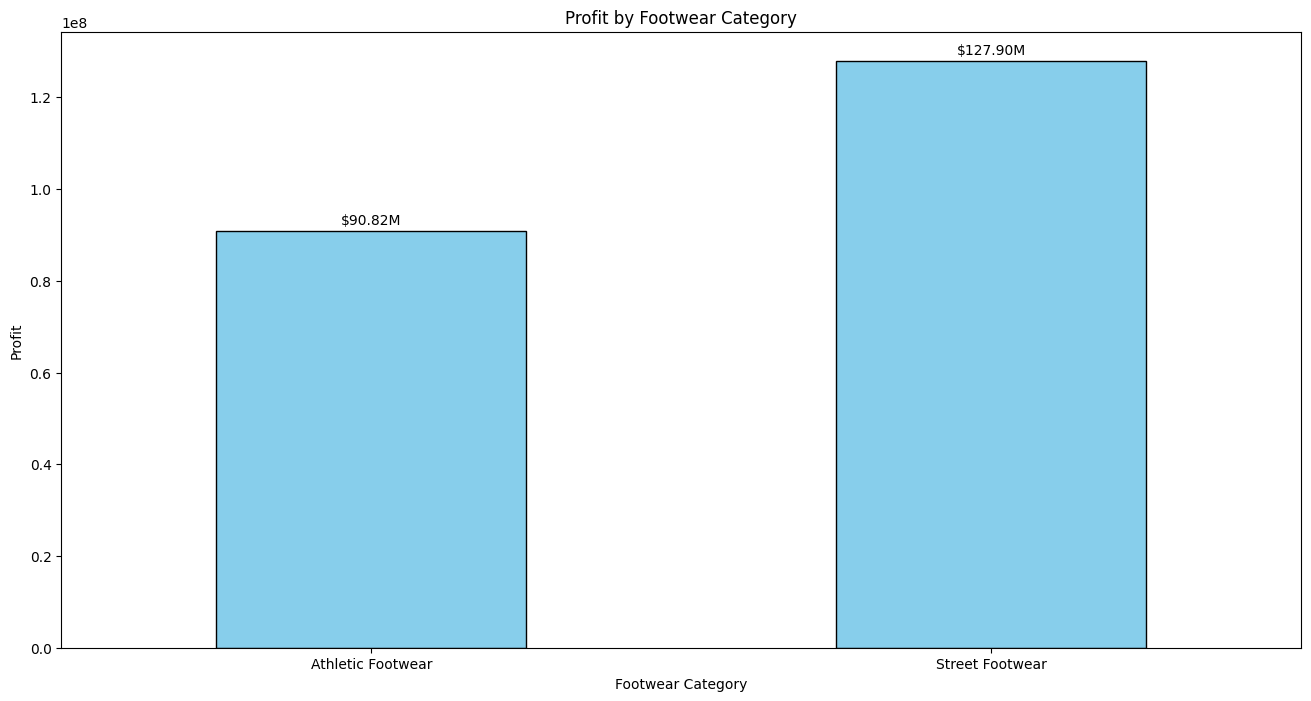

In [398]:
plt.figure(figsize=(16, 8))
bars = df[df['Category'] != 'Apparel'].groupby('Category')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Footwear Category')
plt.xlabel('Footwear Category')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

Operating profit for athletic footwear is **$90.82 million**, while for street footwear it is **$127.9 million**. This shows that the operating profit for street footwear is significantly higher compared to athletic footwear.

<br>

### 38. Which product has the highest average operating profit per unit sold?

In [399]:
df['Operating Profit per Unit'] = df['Operating Profit'] / df['Units Sold']
df.groupby('Product')['Operating Profit per Unit'].mean().round(2)


Product
Men's Apparel                90.04
Men's Athletic Footwear      75.23
Men's Street Footwear        86.91
Women's Apparel              97.78
Women's Athletic Footwear    74.47
Women's Street Footwear      70.64
Name: Operating Profit per Unit, dtype: float64

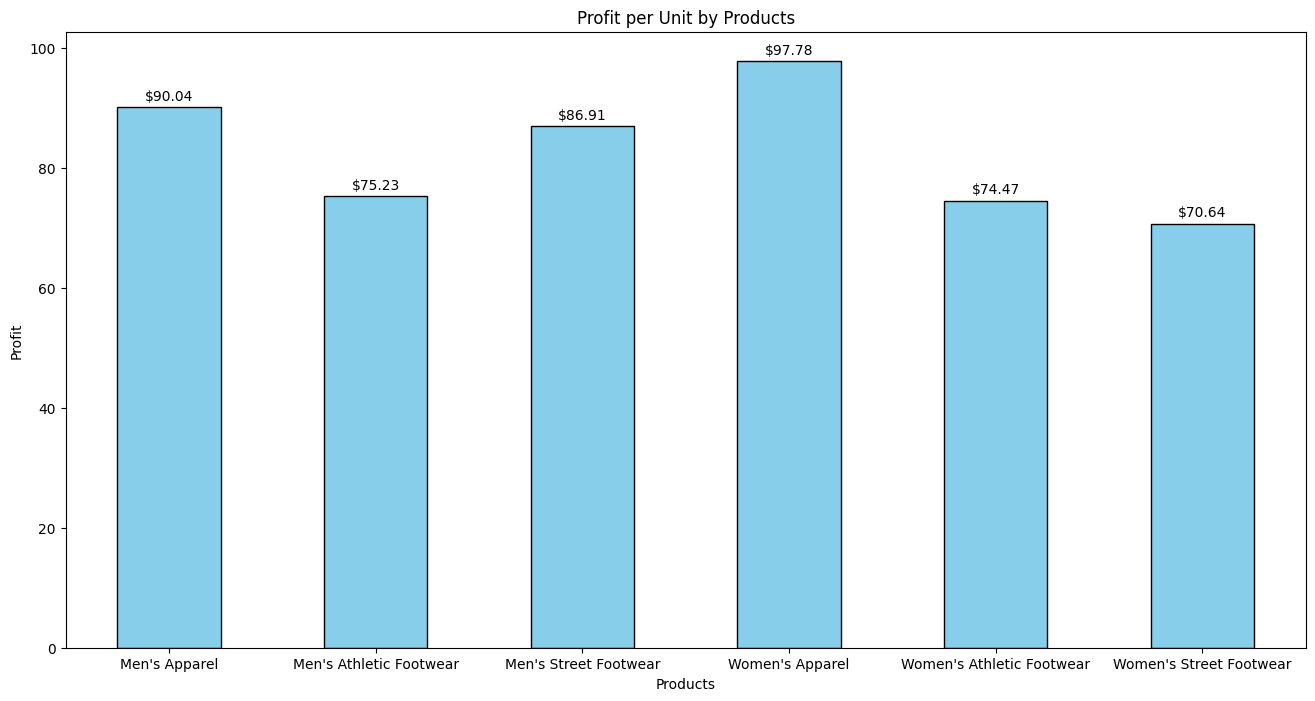

In [400]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Product')['Operating Profit per Unit'].mean().round(2).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit per Unit by Products')
plt.xlabel('Products')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The product with the highest average operating profit per unit sold is **Women's Apparel**, with an average profit of **$97.78** per unit.

<br>

### 39. How does the operating margin differ by state?

In [401]:
operating_margin_by_state = df.groupby('State')['Operating Margin'].mean().round(4).reset_index()
operating_margin_by_state

,State,Operating Margin
0,Alabama,0.5536
1,Alaska,0.3499
2,Arizona,0.3898
3,Arkansas,0.4405
4,California,0.3869
5,Colorado,0.4271
6,Connecticut,0.4016
7,Delaware,0.4280
8,Florida,0.3902
9,Georgia,0.4137


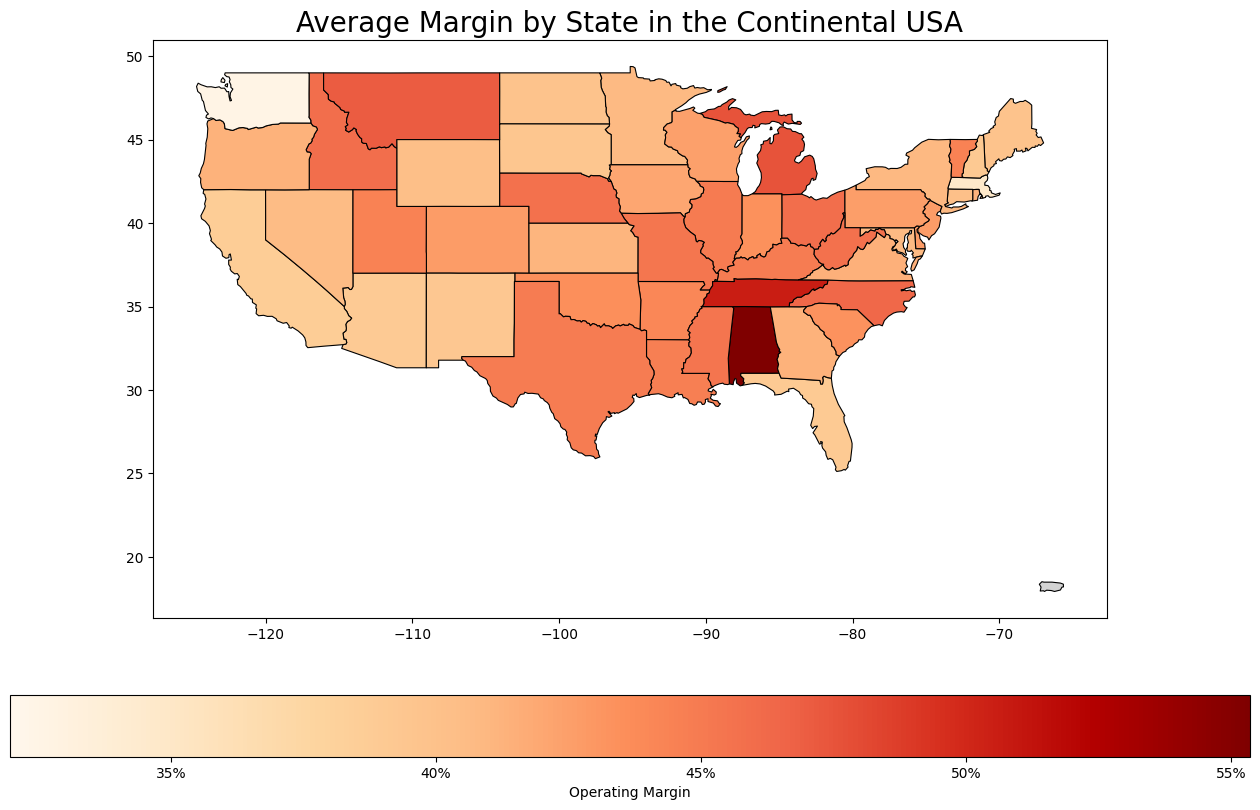

In [402]:
states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
states['name'] = states['name'].str.title()
operating_margin_by_state['State'] = operating_margin_by_state['State'].str.title()
states = states[~states['name'].isin(['Alaska', 'Hawaii'])]
states = states.merge(operating_margin_by_state, how='left', left_on='name', right_on='State')

missing_color = 'lightgrey'
vmin, vmax = operating_margin_by_state['Operating Margin'].min(), operating_margin_by_state['Operating Margin'].max()

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
states.plot(column='Operating Margin', ax=ax, legend=False, cmap='OrRd', edgecolor='black', linewidth=0.8,
            missing_kwds={'color': missing_color, 'label': 'No data'}, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation="horizontal", pad=0.1)
cbar.set_label("Operating Margin")

def format_func(value, tick_number):
        return f'{value * 100:.0f}%'

cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.title('Average Margin by State in the Continental USA', fontsize=20)
plt.show()

Based on the color scale, states like **Alabama** exhibit the **highest operating margin**, approaching **55%**, while states with lighter shades, such as those in the western and central regions, have lower margins around **35% to 40%**. The overall distribution suggests some regional variations, with certain southern and northeastern states displaying stronger operating margins compared to other parts of the country.

<br>

### 40. What is the trend in operating profit over time?

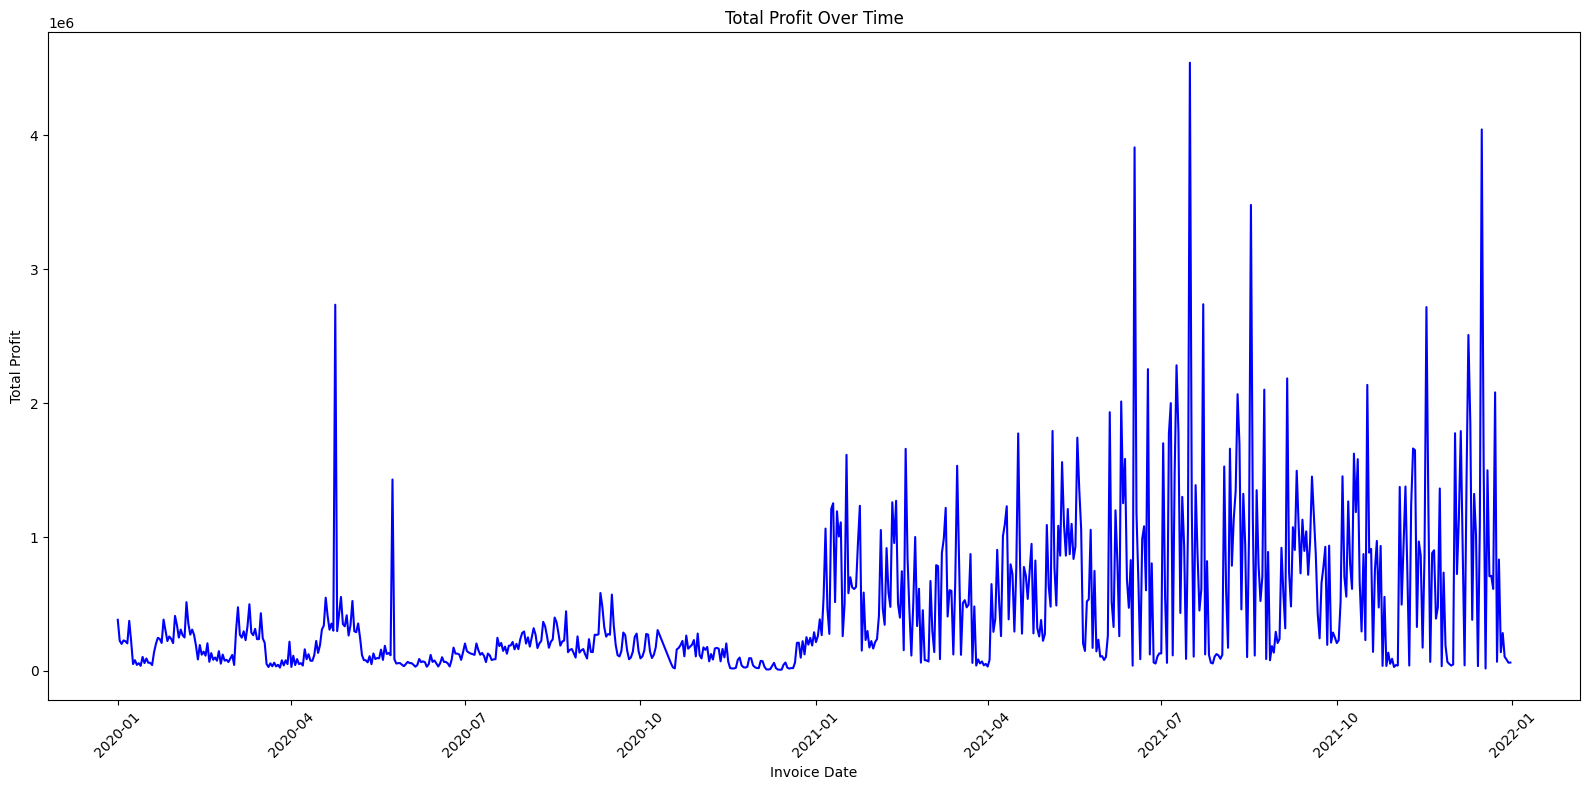

In [403]:
total_profit_date = df.groupby('Invoice Date')['Operating Profit'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(total_profit_date.index, total_profit_date.values, linestyle='-', color='b')
ax.set_title('Total Profit Over Time')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<br>

### 41. How does total operating profit compare across different months?

In [407]:
import calendar

df['Month'] = df['Invoice Date'].dt.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

In [409]:
df.groupby('Month')['Operating Profit'].sum()

Month
April        27559237.31
August       34451440.30
December     31590202.03
February     21392736.70
January      25141934.51
July         34054898.59
June         26714715.92
March        20439788.00
May          29946255.33
November     24755521.43
October      25078444.60
September    31009586.73
Name: Operating Profit, dtype: float64

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_18020\3819472434.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



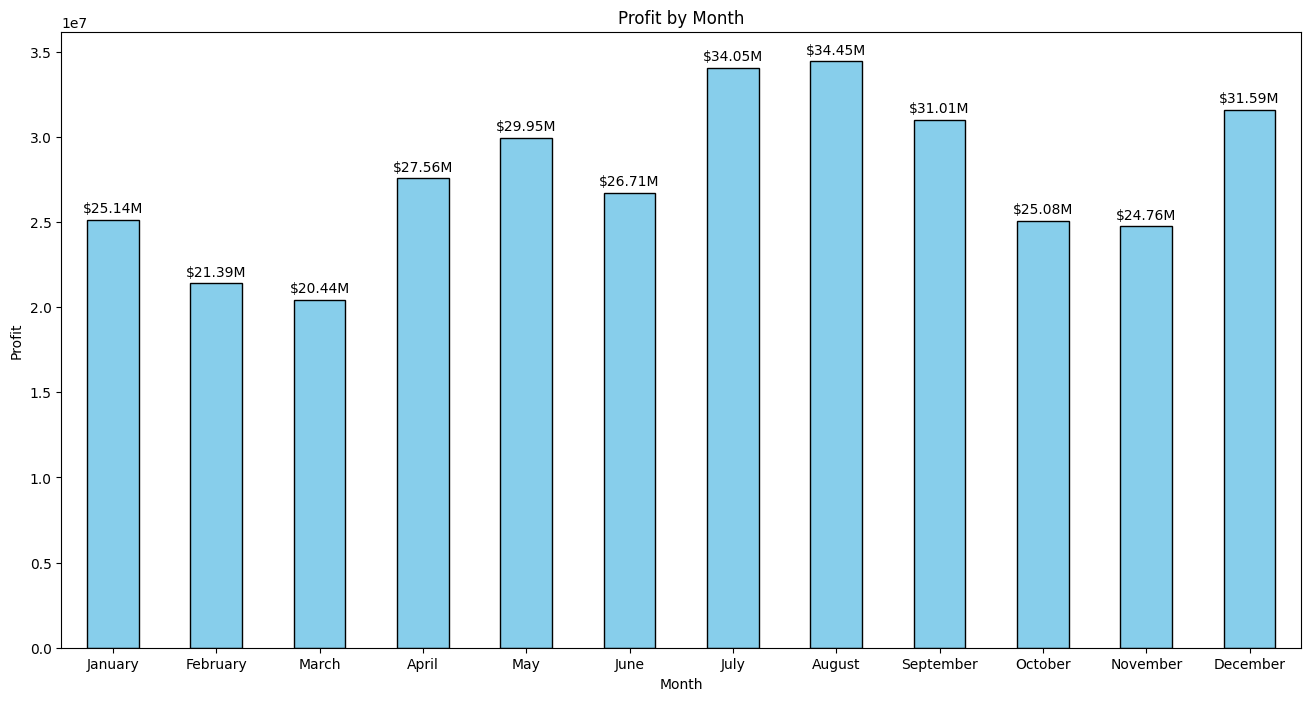

In [410]:
df['Month'] = pd.Categorical(df['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df.sort_values('Month', inplace=True)

plt.figure(figsize=(16, 8))
bars = df.groupby('Month')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

Total operating profit varies across different months, with **August** showing the highest operating profit at **$34.45 million**, followed closely by **July** with **$34.05 million**. Other months like **December** and **September** also display relatively high profits, with **$31.59 million** and **$31.01 million** respectively. 

In contrast, **February** and **March** show the lowest operating profits at **$21.39 million** and **$20.44 million** respectively. Overall, the data indicates a peak in operating profit during the summer months and a dip during the early part of the year.

<br>

### 42. Which retailer has the highest average operating margin?

In [411]:
(df.groupby('Retailer')['Operating Margin'].mean().round(5) * 100).astype(str) + ' %'

Retailer
Amazon                       41.787 %
Foot Locker                  41.785 %
Kohl's                       41.929 %
Sports Direct    44.489000000000004 %
Walmart                      40.653 %
West Gear                    41.786 %
Name: Operating Margin, dtype: object

The retailer with the highest average operating margin is **Sports Direct**, with an average margin of **44.49%**.

<br>

### 43. What is the average operating margin for in-store vs. online sales?

In [412]:
(df[df['Sales Method'] != 'Outlet'].groupby('Sales Method')['Operating Margin'].mean().round(5) * 100).astype(str) + ' %'

Sales Method
In-store    35.612 %
Online      46.412 %
Name: Operating Margin, dtype: object

The average operating margin for **in-store sales** is **35.61%**, while for **online sales** it is significantly higher at **46.42%**.

<br>

### 44. What is the total operating profit generated by each product category?

In [413]:
df.groupby('Category')['Operating Profit'].sum()

Category
Apparel              1.134140e+08
Athletic Footwear    9.082267e+07
Street Footwear      1.278981e+08
Name: Operating Profit, dtype: float64

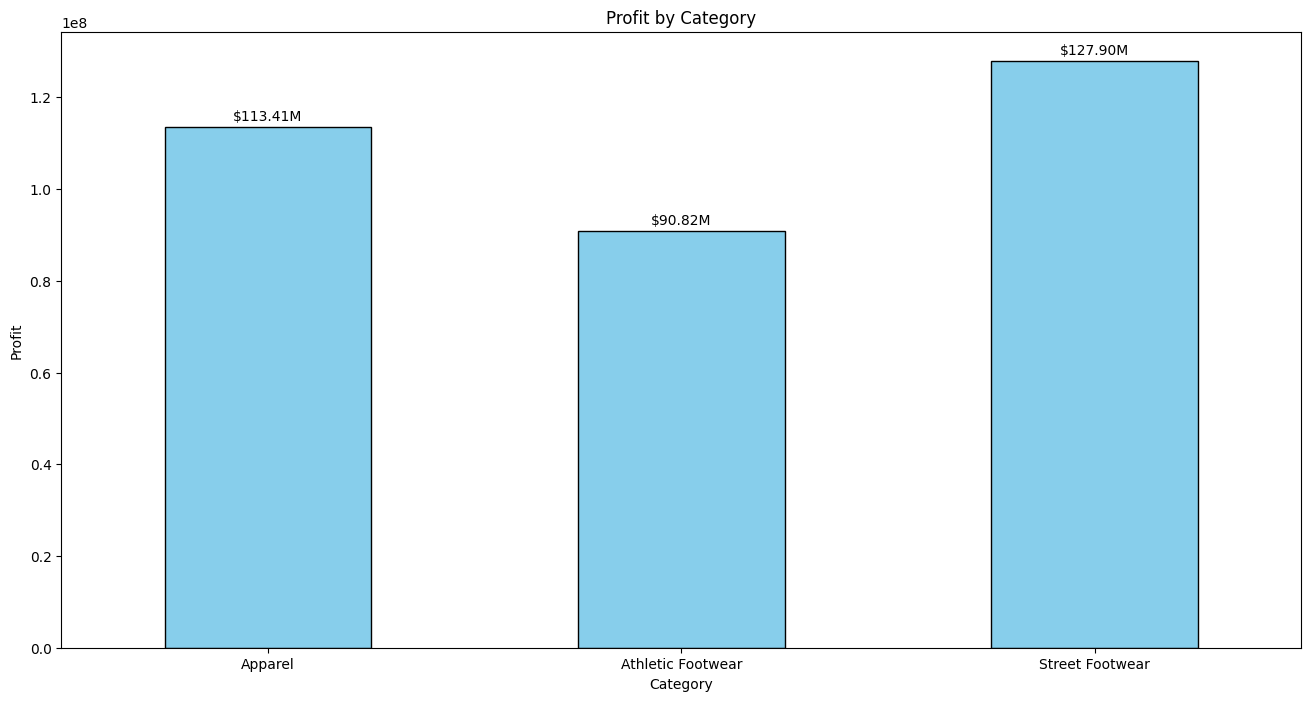

In [414]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() / 1000000:.2f}M',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The total operating profit generated by each product category is as follows: **Apparel** generated **$113.41 million**, **Athletic Footwear** generated **$90.82 million**, and **Street Footwear** generated **$127.90 million**.

<br>

### 45. What is the lowest recorded operating margin in the dataset?

In [415]:
df['Operating Margin'].min()

0.1

The lowest recorded operating margin in the dataset is **10%**.

<br>

### 46. How do operating margins vary across different regions?

In [416]:
(df.groupby('Region')['Operating Margin'].mean().round(4) * 100).astype(str) + ' %'

Region
Midwest      43.519999999999996 %
Northeast                 41.05 %
South                     46.69 %
Southeast                 41.92 %
West                      39.67 %
Name: Operating Margin, dtype: object

Operating margins vary across different regions as follows: the **South** has the highest average operating margin at **46.69%**, followed by the **Midwest** with **43.53%**. The **Southeast** and **Northeast** regions show similar margins at **41.92%** and **41.05%** respectively. The **West** has the lowest operating margin at **39.67%**.

<br>

### 47. Which retailer has the lowest average operating margin?

In [417]:
(df.groupby('Retailer')['Operating Margin'].mean().round(4) * 100).astype(str) + ' %'

Retailer
Amazon           41.79 %
Foot Locker      41.79 %
Kohl's           41.93 %
Sports Direct    44.49 %
Walmart          40.65 %
West Gear        41.79 %
Name: Operating Margin, dtype: object

The retailer with the lowest average operating margin is **Walmart**, with a margin of **40.65%**.

<br>

### 48. What are the 10 cities with the highest average margin?

In [418]:
(df.groupby('City')['Operating Margin'].mean().round(4).nlargest(10) * 100).astype(str) + ' %'

City
Birmingham                 55.36 %
Knoxville     50.660000000000004 %
Detroit                    47.58 %
Billings      47.099999999999994 %
Charlotte                  46.35 %
Dallas        46.239999999999995 %
Columbus                    45.9 %
Boise                      45.89 %
Omaha                      45.76 %
Jackson                    45.43 %
Name: Operating Margin, dtype: object

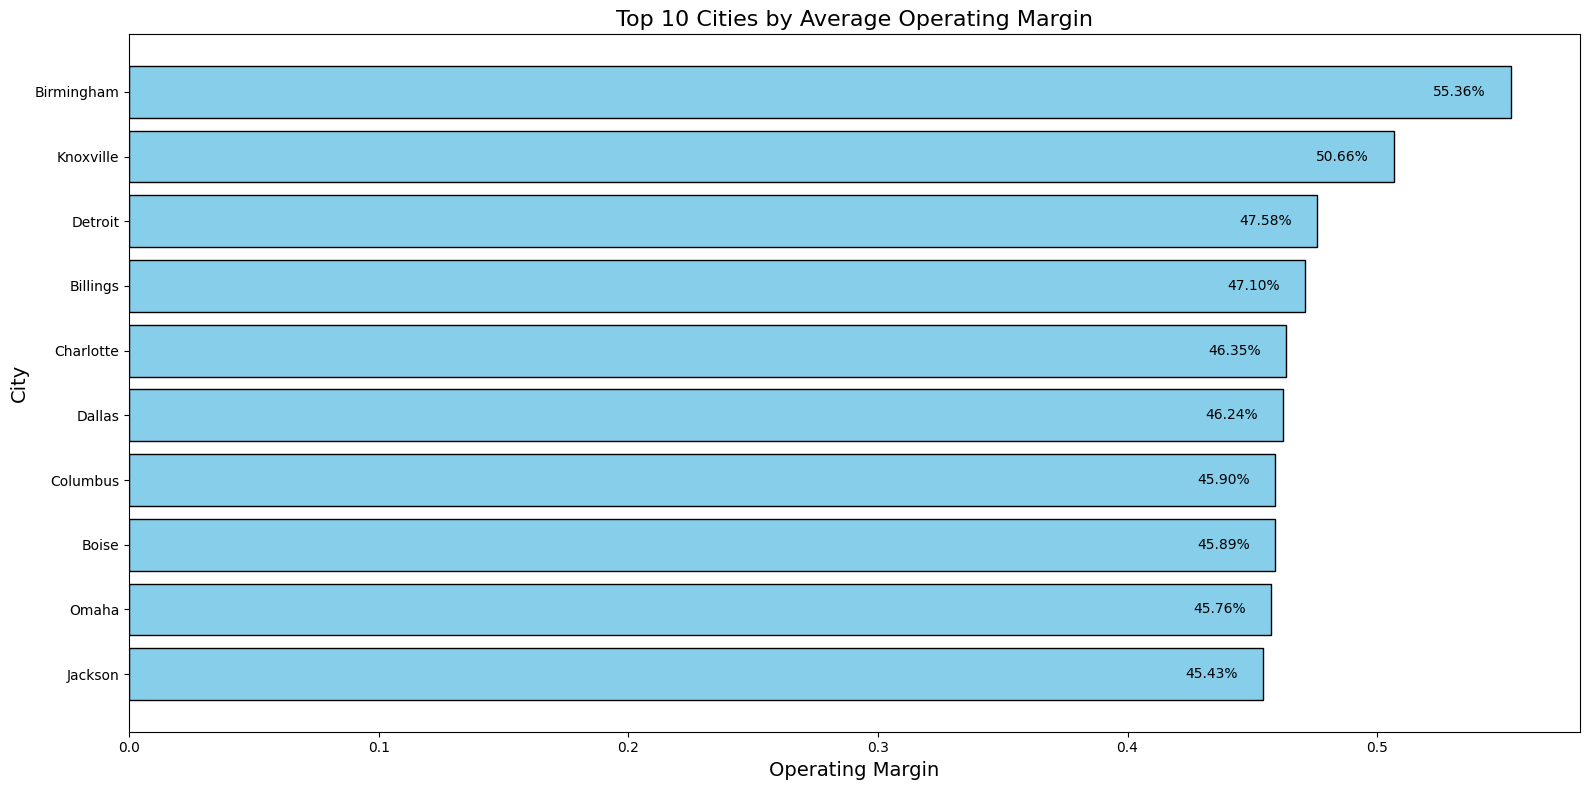

In [419]:
fig, ax = plt.subplots(figsize=(16, 8))

top_10_cities = df.groupby('City')['Operating Margin'].mean().round(4).nlargest(10)
bars = ax.barh(top_10_cities.index[::-1], top_10_cities.values[::-1], color='skyblue', edgecolor='black')

ax.set_title('Top 10 Cities by Average Operating Margin', fontsize=16)
ax.set_xlabel('Operating Margin', fontsize=14)
ax.set_ylabel('City', fontsize=14)

for bar in bars:
    width = bar.get_width()
    ax.text(width - 0.01, bar.get_y() + bar.get_height() / 2, 
            f'{width * 100:.2f}%', ha='right', va='center', fontsize=10, color='black')


plt.tight_layout()
plt.show()

The 10 cities with the highest average operating margins are **Birmingham** at **55.36%**, Knoxville at 50.66%, Detroit at 47.58%, Billings at 47.10%, Charlotte at 46.35%, Dallas at 46.24%, Columbus at 45.90%, Boise at 45.89%, Omaha at 45.79%, and Jackson at 45.43%.

<br>

## Product Performance

### 49. Which product has the highest number of units sold?

In [420]:
df.groupby('Product')['Units Sold'].sum()

Product
Men's Apparel                306683
Men's Athletic Footwear      435526
Men's Street Footwear        593320
Women's Apparel              433827
Women's Athletic Footwear    317236
Women's Street Footwear      392269
Name: Units Sold, dtype: int64

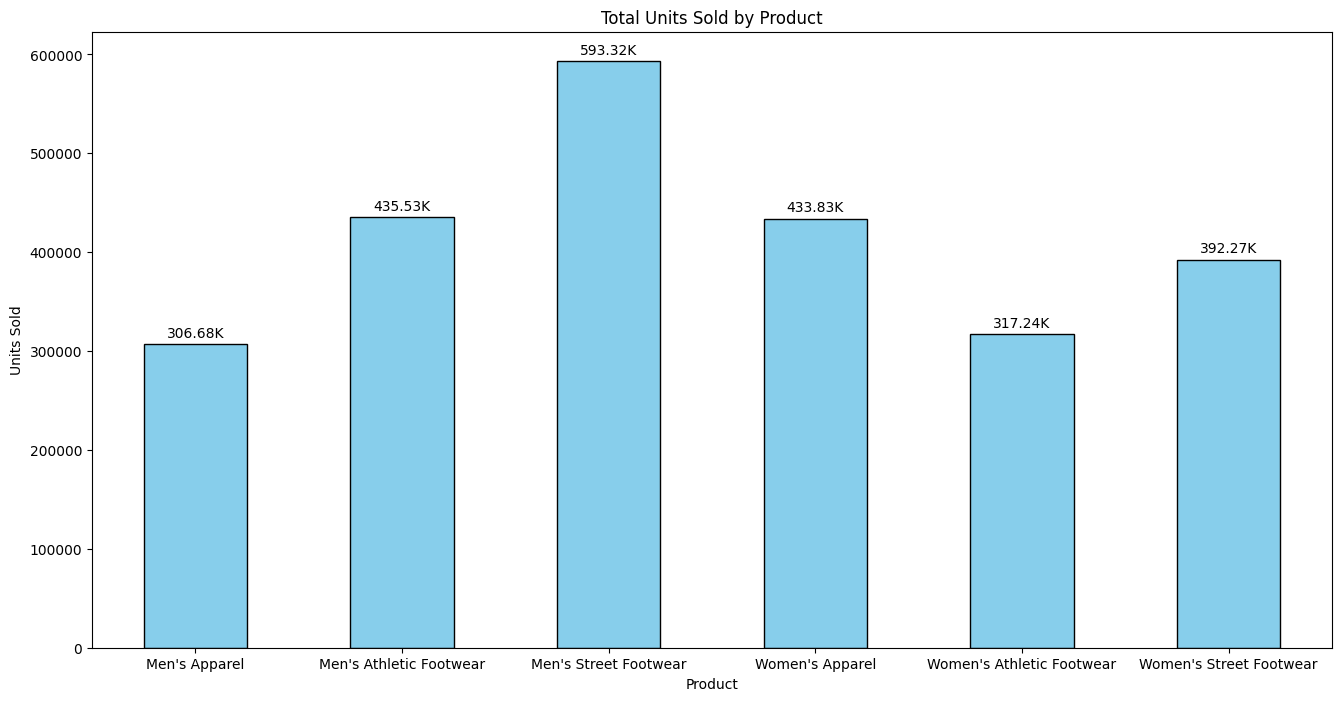

In [421]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Product')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height() / 1000:.2f}K',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The product with the highest number of units sold is **Men's Street Footwear**, with a total of **593 320** units sold.

<br>

### 50. What is the average price per unit for each product category?

In [422]:
df.groupby('Category')['Price per Unit'].mean().round(2)

Category
Apparel              50.96
Athletic Footwear    42.46
Street Footwear      42.25
Name: Price per Unit, dtype: float64

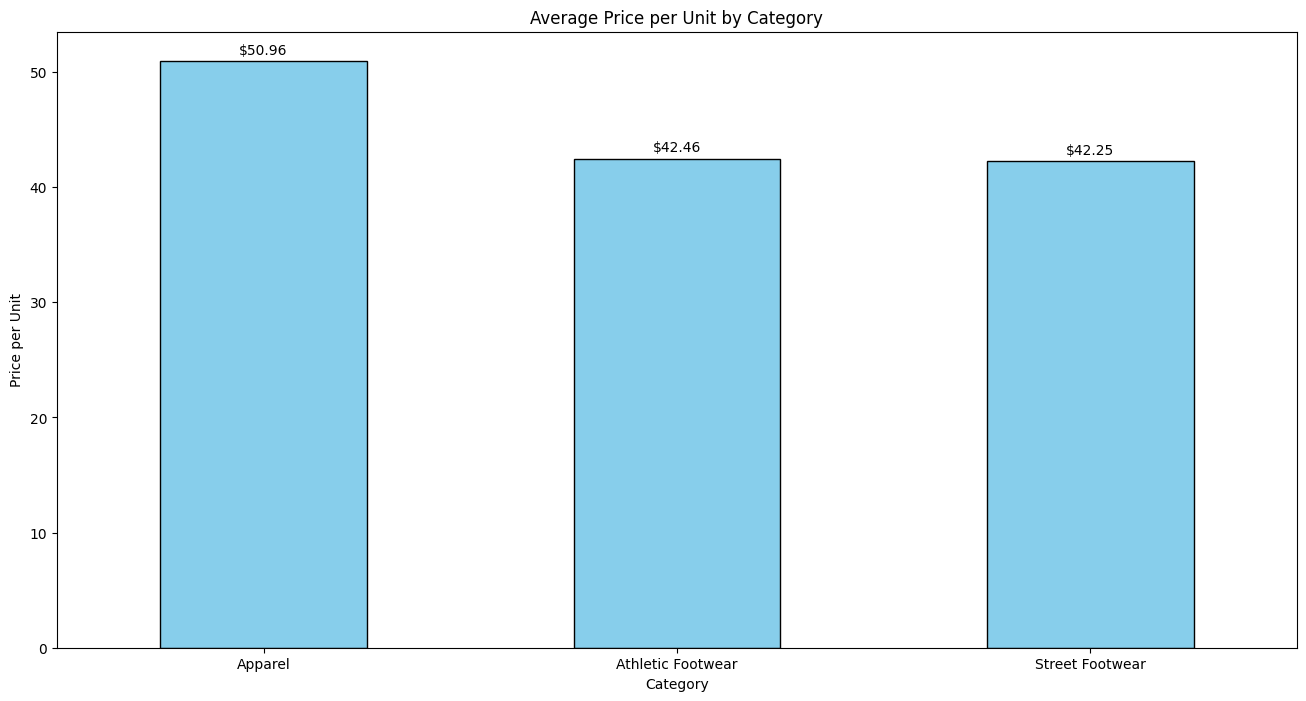

In [423]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Price per Unit'].mean().round(2).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Price per Unit by Category')
plt.xlabel('Category')
plt.ylabel('Price per Unit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() :.2f}',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The average price per unit for each product category is as follows: **Apparel** is **$50.96**, **Athletic Footwear** is **$42.45**, and **Street Footwear** is **$42.25**.

<br>

### 51. How does the number of units sold vary across different product types?

In [424]:
df.groupby('Category')['Units Sold'].sum()

Category
Apparel              740510
Athletic Footwear    752762
Street Footwear      985589
Name: Units Sold, dtype: int64

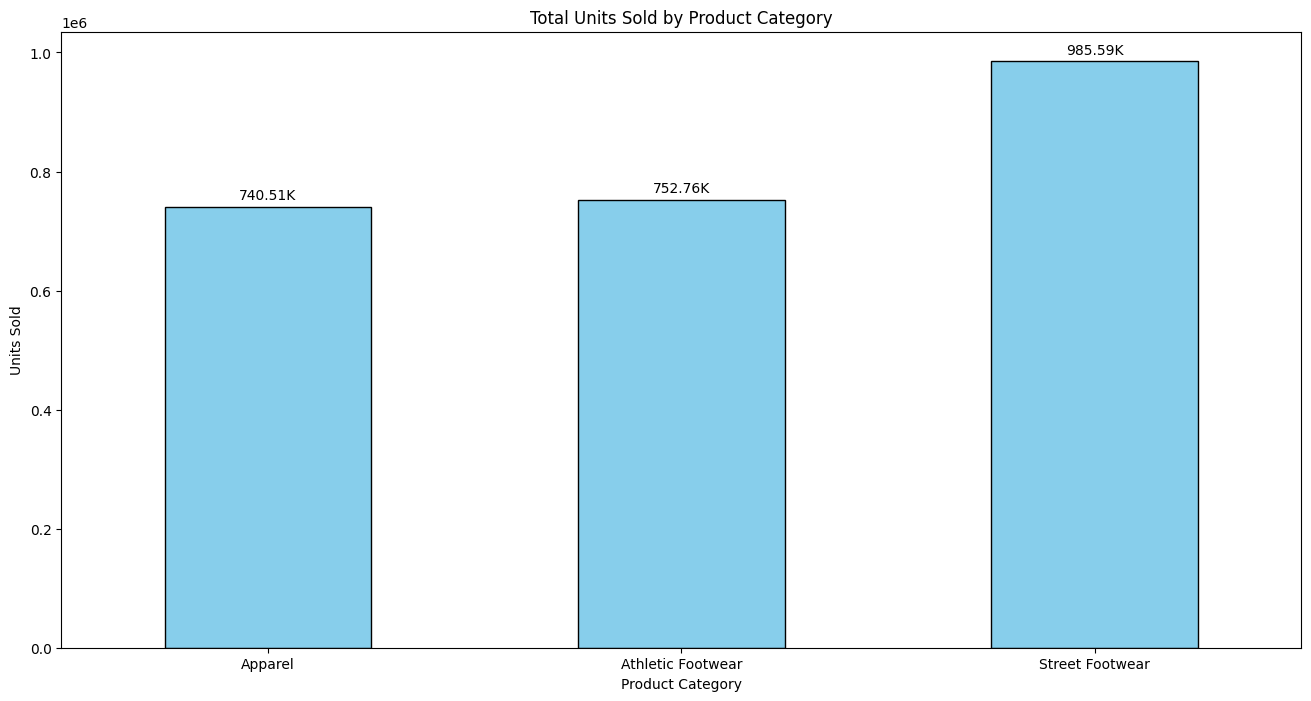

In [425]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height() / 1000:.2f}K',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The number of units sold varies across different product types as follows: **Apparel** sold **740 510** units, **Athletic Footwear** sold **752 762** units, and **Street Footwear** sold **985 589** units. This shows that **Street Footwear** has the highest number of units sold, followed by **Athletic Footwear** and **Apparel**.

<br>

### 52. What is the relationship between product type and total sales revenue?

In [426]:
df.groupby('Category')['Total Sales'].agg(['sum', 'mean', 'min', 'median', 'max']).round(2)

,sum,mean,min,median,max
Category,,,,,
Apparel,302767492.0,94202.70,252.0,9596.5,825000.0
Athletic Footwear,260305576.0,81041.59,160.0,8610.0,712500.0
Street Footwear,336829057.0,104670.31,369.0,10202.5,810000.0


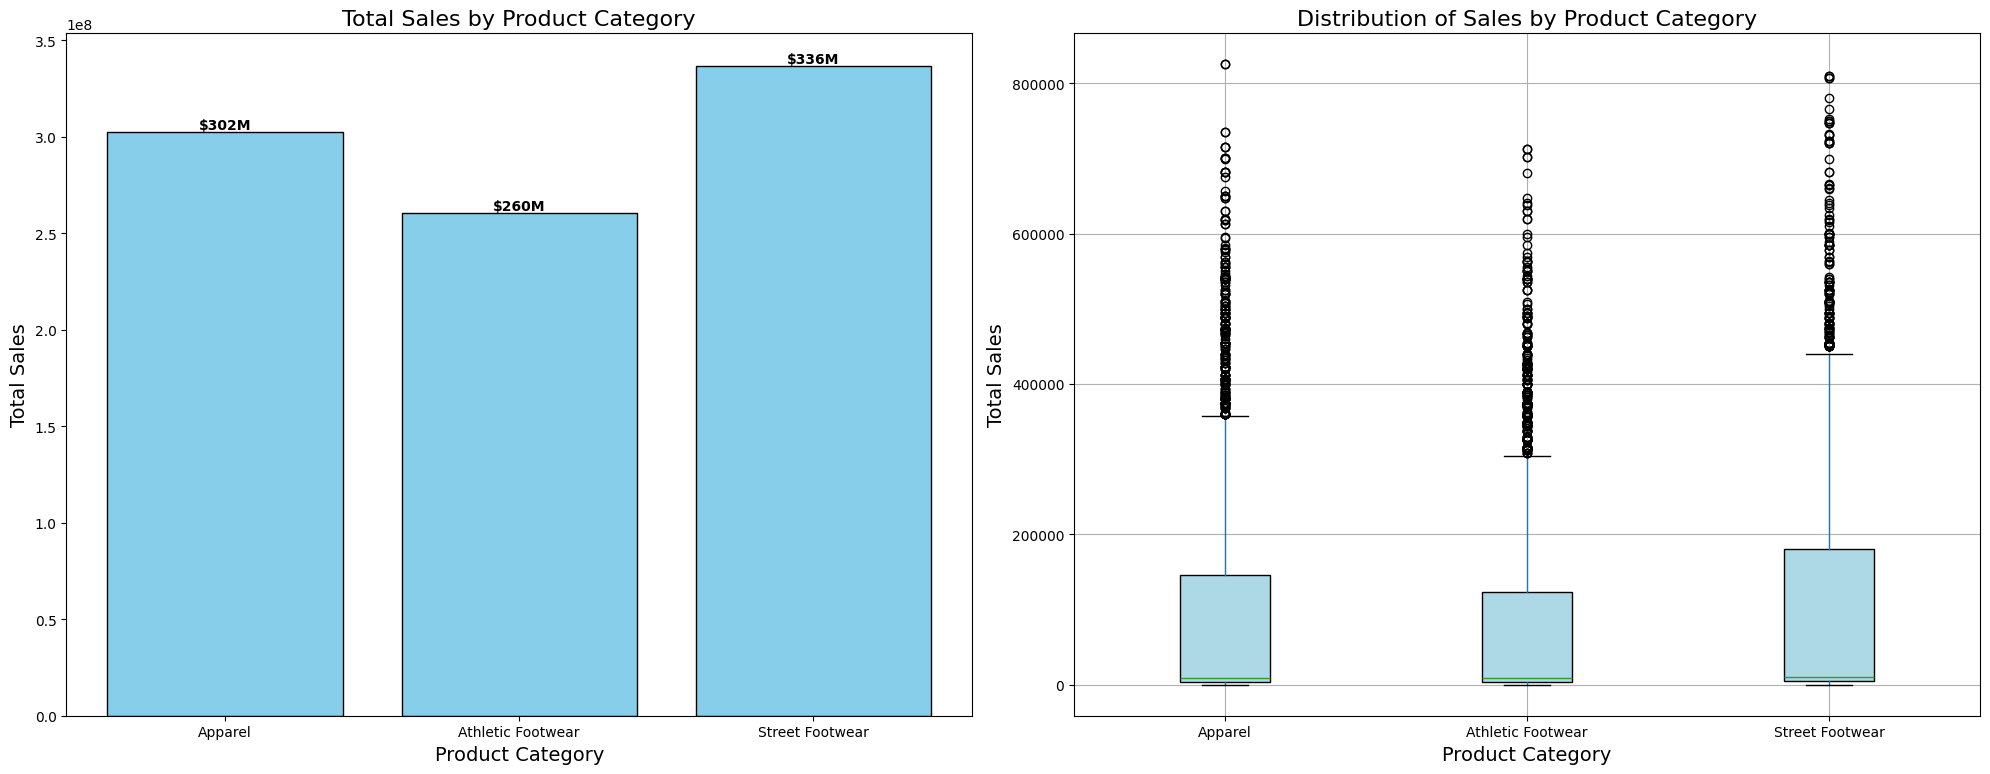

In [437]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- Bar plot ---
bars = axes[0].bar(df.groupby('Category')['Total Sales'].sum().index, df.groupby('Category')['Total Sales'].sum().values, color='skyblue', edgecolor='black')
axes[0].set_title('Total Sales by Product Category', fontsize=16)
axes[0].set_xlabel('Product Category', fontsize=14)
axes[0].set_ylabel('Total Sales', fontsize=14)
axes[0].tick_params(axis='x', rotation=360)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'${int(height / 1000000):,.0f}M', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# --- Box plot ---
df.boxplot(column='Total Sales', by='Category', ax=axes[1], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
axes[1].set_title('Distribution of Sales by Product Category', fontsize=16)
axes[1].set_xlabel('Product Category', fontsize=14)
axes[1].set_ylabel('Total Sales', fontsize=14)
axes[1].tick_params(axis='x', rotation=360)

plt.suptitle('')
plt.tight_layout()
plt.show()

The relationship between product type and total sales revenue is as follows: **Street Footwear** generates the highest total sales revenue at **$336.83 million**, followed by **Apparel** with **$302.77 million**, and **Athletic Footwear** with **$260.31 million**. In terms of average sales revenue per unit, **Street Footwear** also leads with an average of **$104 670.31**, while **Apparel** averages **$94 202.70**, and **Athletic Footwear** averages **$81 041.59**. This data suggests that **Street Footwear** not only sells more units but also generates higher revenue on average compared to the other product types.

<br>

### 53. Which product category has the highest average price per unit?

In [440]:
df.groupby('Category')['Price per Unit'].mean().round(2)

Category
Apparel              50.96
Athletic Footwear    42.46
Street Footwear      42.25
Name: Price per Unit, dtype: float64

The product category with the highest average price per unit is **Apparel**, with an average price of **$50.96**.

<br>

### 54. How does the price per unit vary by retailer?

In [443]:
df.groupby('Retailer')['Price per Unit'].mean().round(2)

Retailer
Amazon           48.76
Foot Locker      44.81
Kohl's           44.61
Sports Direct    42.05
Walmart          47.18
West Gear        46.74
Name: Price per Unit, dtype: float64

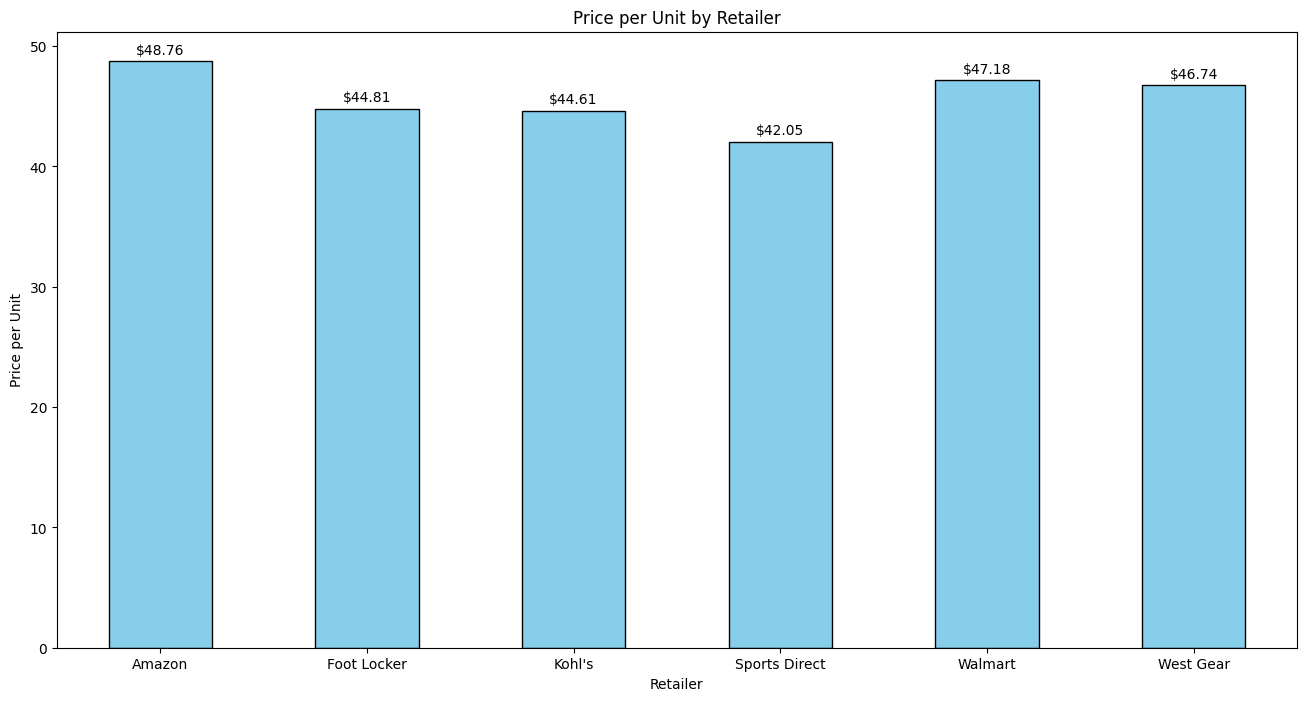

In [444]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Price per Unit'].mean().round(2).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Price per Unit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Price per Unit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'${bar.get_height() :.2f}',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

The price per unit varies by retailer as follows: **Amazon** has the highest price per unit at **$48.76**, followed by **Walmart** at **$47.18**, and **West Gear** at **$46.74**. **Foot Locker** and **Kohl's** have similar prices at **$44.81** and **$44.61**, respectively. **Sports Direct** has the lowest price per unit at **$42.05**.

<br>